In [1]:
import numpy as np

import os
from glob import glob
from tqdm import tqdm

def optimal_n_bins(y,max_bins=100):
    from scipy.stats import iqr
    n_bins = int((max(y) - min(y))/(2*iqr(y)*len(y)**(-1/3)))
    return min(n_bins,max_bins)

import matplotlib
import matplotlib.pyplot as plt
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 18}
matplotlib.rc('font', **font)

import pandas as pd
import pickle as pkl


In [2]:
path_to_usdb_csv = './sd_GT_usdb.csv'
df_usdb = pd.read_csv(path_to_usdb_csv)

In [3]:
usdbmil = np.loadtxt('/p/lustre2/fox39/shmuq/usdb/shmuq_gt/usdbmil.vec',skiprows=1)
usdb = np.loadtxt('/p/lustre2/fox39/shmuq/usdb/shmuq_gt/usdb.vec',skiprows=1)

In [4]:
n_transitions = len(df_usdb[df_usdb['include']==True])
print('# transitions =', n_transitions)

# transitions = 185


In [5]:
gA = 1.28

df_usdb['Bth_gA2'] = df_usdb['Bth']*gA**2
df_usdb['Berr_gA2'] = df_usdb['Bexp']-df_usdb['Bth_gA2']-1.0*df_usdb['Tmirror']
df_usdb['Berr'] = df_usdb['Bexp']-df_usdb['Bth']-1.0*df_usdb['Tmirror']


Simply using $g_A$ at the free-nucleon value, unquenched, we have this distribution of absolute errors for B(GT)

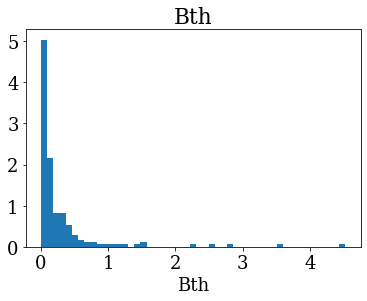

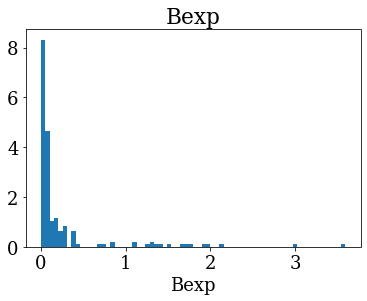

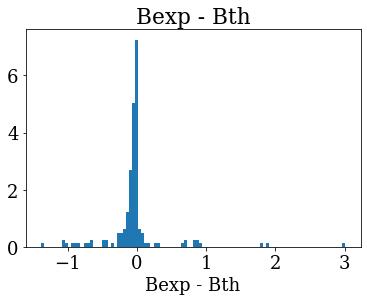

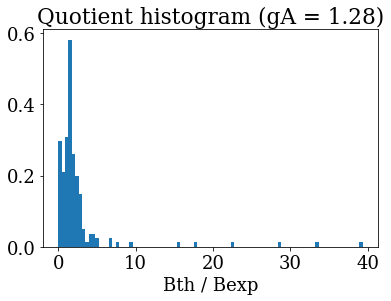

In [6]:
y = np.array(df_usdb['Bth_gA2'])
plt.hist(y, bins=optimal_n_bins(y), density=True)
plt.title(f'Bth')
plt.xlabel('Bth')
plt.show()

y = np.array(df_usdb['Bexp'])
plt.hist(y, bins=optimal_n_bins(y), density=True)
plt.title(f'Bexp')
plt.xlabel('Bexp')
plt.show()

y = np.array(df_usdb['Bexp'] - df_usdb['Bth_gA2'])
plt.hist(y, bins=optimal_n_bins(y), density=True)
plt.title(f'Bexp - Bth')
plt.xlabel('Bexp - Bth')
plt.show()

y = np.array(df_usdb['Bth_gA2'] / df_usdb['Bexp'])
plt.hist(y, bins=optimal_n_bins(y), density=True)
plt.title(f'Quotient histogram (gA = {gA})')
plt.xlabel('Bth / Bexp')
plt.show()

In [7]:
from scipy.optimize import minimize

def objective(dBap,q,df):
    chi_squared = np.sum((df['Bexp']-q**2*df['Bth_gA2']-1.0*df['Tmirror'])**2/(df['sigma_B']**2 + dBap**2)) 
    dof = n_transitions - 66
    return (chi_squared/dof - 1)**2

dBap = minimize(objective,x0=0.5,args=(0.77,df_usdb),bounds=[(0,10000)]).x[0]

In [8]:
print('a priori B(GT) std. dev. =', dBap)
print('a priori B(GT) variance =', dBap**2)

a priori B(GT) std. dev. = 0.563587022755636
a priori B(GT) variance = 0.31763033221856174


In [9]:
df_usdb['Bresid'] = df_usdb['Berr']/np.sqrt(df_usdb['sigma_B']**2 + dBap**2)
df_usdb['Bresid_gA2'] = (df_usdb['Bexp']-df_usdb['Bth_gA2']-1.0*df_usdb['Tmirror'])/np.sqrt(df_usdb['sigma_B']**2 + dBap**2)

In [10]:
# data_path = '/p/lustre2/fox39/shmuq/usdb/shmuq_gt/batch_results'
# run_dir_list = []
# for batch_dir in sorted(glob(os.path.join(data_path,'batch_job*'))):
# #     print(batch_dir)
#     for run_dir in sorted(glob(os.path.join(batch_dir,'run_usdb_rand?????'))):
#         run_dir_list.append(run_dir)
#         print(run_dir)

#not organized by run directory anymore, just each csv file in batch_dir 
data_path = '/p/lustre2/fox39/shmuq/usdb/shmuq_gt/batch_results'
df_dict = {}
problem_cases = []
numbers_list = []
for batch_dir in tqdm(sorted(glob(os.path.join(data_path,'batch_job*')))):
#     print(batch_dir)
    for csv_path in sorted(glob(os.path.join(batch_dir,'sd_GT_usdb_rand?????.csv'))):
        csv_name = os.path.split(csv_path)[-1]
#         print(csv_name)
        int_vec_name = csv_name[6:].replace('.csv','.vec')
#         print(int_vec_name)
        mil_vec_name = int_vec_name.replace('usdb','usdbmil')
#         print(mil_vec_name)
        run_num_string = int_vec_name.split('rand')[-1][:-4]
        print(run_num_string)
        
        numbers_list.append(run_num_string)
        
        try:
            df_dict[run_num_string] = [pd.read_csv(os.path.join(batch_dir,csv_name)), 
                                   np.loadtxt(os.path.join(batch_dir,int_vec_name),skiprows=1), 
                                   np.loadtxt(os.path.join(batch_dir,mil_vec_name),skiprows=1)]
        except OSError:
            problem_cases.append(run_num_string)
            print('--------WARNING--------')
            print(f'PROBLEM AT {run_num_string}')

  0%|          | 0/1000 [00:00<?, ?it/s]

00001
00002
00003
00004
00005
00006
00007
00008
00009
00010


  0%|          | 1/1000 [00:04<1:08:34,  4.12s/it]

00011
00012
00013
00014
00015
00016
00017
00018
00019
00020


  0%|          | 2/1000 [00:07<1:00:39,  3.65s/it]

00021
00022
00023
00024
00025
00026
00027
00028
00029
00030


  0%|          | 3/1000 [00:10<55:05,  3.32s/it]  

00031
00032
00033
00034
00035
00036
00037
00038
00039
00040


  0%|          | 4/1000 [00:13<56:13,  3.39s/it]

00041
00042
00043
00044
00045
00046
00047
00048
00049
00050


  0%|          | 5/1000 [00:17<55:15,  3.33s/it]

00051
00052
00053
00054
00055
00056
00057
00058
00059
00060


  1%|          | 6/1000 [00:20<54:36,  3.30s/it]

00061
00062
00063
00064
00065
00066
00067
00068
00069
00070


  1%|          | 7/1000 [00:23<55:23,  3.35s/it]

00071
00072
00073
00074
00075
00076
00077
00078
00079
00080


  1%|          | 8/1000 [00:27<56:33,  3.42s/it]

00081
00082
00083
00084
00085
00086
00087
00088
00089
00090


  1%|          | 9/1000 [00:30<56:52,  3.44s/it]

00091
00092
00093
00094
00095
00096
00097
00098
00099
00100


  1%|          | 10/1000 [00:34<56:37,  3.43s/it]

00101
00102
00103
00104
00105
00106
00107
00108
00109
00110


  1%|          | 11/1000 [00:37<57:19,  3.48s/it]

00111
00112
00113
00114
00115
00116
00117
00118
00119
00120


  1%|          | 12/1000 [00:41<56:21,  3.42s/it]

00121
00122
00123
00124
00125
00126
00127
00128
00129
00130


  1%|▏         | 13/1000 [00:44<56:24,  3.43s/it]

00131
00132
00133
00134
00135
00136
00137
00138
00139
00140


  1%|▏         | 14/1000 [00:48<56:56,  3.47s/it]

00141
00142
00143
00144
00145
00146
00147
00148
00149
00150


  2%|▏         | 15/1000 [00:51<57:04,  3.48s/it]

00151
00152
00153
00154
00155
00156
00157
00158
00159
00160


  2%|▏         | 16/1000 [00:55<56:47,  3.46s/it]

00161
00162
00163
00164
00165
00166
00167
00168
00169
00170


  2%|▏         | 17/1000 [00:58<55:15,  3.37s/it]

00171
00172
00173
00174
00175
00176
00177
00178
00179
00180


  2%|▏         | 18/1000 [01:01<55:00,  3.36s/it]

00181
00182
00183
00184
00185
00186
00187
00188
00189
00190


  2%|▏         | 19/1000 [01:05<56:05,  3.43s/it]

00191
00192
00193
00194
00195
00196
00197
00198
00199
00200


  2%|▏         | 20/1000 [01:09<58:22,  3.57s/it]

00201
00202
00203
00204
00205
00206
00207
00208
00209
00210


  2%|▏         | 21/1000 [01:12<57:47,  3.54s/it]

00211
00212
00213
00214
00215
00216
00217
00218
00219
00220


  2%|▏         | 22/1000 [01:15<56:25,  3.46s/it]

00221
00222
00223
00224
00225
00226
00227
00228
00229
00230


  2%|▏         | 23/1000 [01:19<56:36,  3.48s/it]

00231
00232
00233
00234
00235
00236
00237
00238
00239
00240


  2%|▏         | 24/1000 [01:22<57:07,  3.51s/it]

00241
00242
00243
00244
00245
00246
00247
00248
00249
00250


  2%|▎         | 25/1000 [01:26<56:01,  3.45s/it]

00251
00252
00253
00254
00255
00256
00257
00258
00259
00260


  3%|▎         | 26/1000 [01:29<57:20,  3.53s/it]

00261
00262
00263
00264
00265
00266
00267
00268
00269
00270


  3%|▎         | 27/1000 [01:33<57:34,  3.55s/it]

00271
00272
00273
00274
00275
00276
00277
00278
00279
00280


  3%|▎         | 28/1000 [01:37<59:53,  3.70s/it]

00281
00282
00283
00284
00285
00286
00287
00288
00289
00290


  3%|▎         | 29/1000 [01:41<58:37,  3.62s/it]

00291
00292
00293
00294
00295
00296
00297
00298
00299
00300


  3%|▎         | 30/1000 [01:43<55:04,  3.41s/it]

00301
00302
00303
00304
00305
00306
00307
00308
00309
00310


  3%|▎         | 31/1000 [01:47<55:20,  3.43s/it]

00311
00312
00313
00314
00315
00316
00317
00318
00319
00320


  3%|▎         | 32/1000 [01:50<55:38,  3.45s/it]

00321
00322
00323
00324
00325
00326
00327
00328
00329
00330


  3%|▎         | 33/1000 [01:54<56:59,  3.54s/it]

00331
00332
00333
00334
00335
00336
00337
00338
00339
00340


  3%|▎         | 34/1000 [01:58<59:00,  3.67s/it]

00341
00342
00343
00344
00345
00346
00347
00348
00349
00350


  4%|▎         | 35/1000 [02:02<58:12,  3.62s/it]

00351
00352
00353
00354
00355
00356
00357
00358
00359
00360


  4%|▎         | 36/1000 [02:05<55:52,  3.48s/it]

00361
00362
00363
00364
00365
00366
00367
00368
00369
00370


  4%|▎         | 37/1000 [02:08<55:00,  3.43s/it]

00371
00372
00373
00374
00375
00376
00377
00378
00379
00380


  4%|▍         | 38/1000 [02:12<55:10,  3.44s/it]

00381
00382
00383
00384
00385
00386
00387
00388
00389
00390


  4%|▍         | 39/1000 [02:15<54:59,  3.43s/it]

00391
00392
00393
00394
00395
00396
00397
00398
00399
00400


  4%|▍         | 40/1000 [02:18<54:32,  3.41s/it]

00401
00402
00403
00404
00405
00406
00407
00408
00409
00410


  4%|▍         | 41/1000 [02:22<54:23,  3.40s/it]

00411
00412
00413
00414
00415
00416
00417
00418
00419
00420


  4%|▍         | 42/1000 [02:25<54:14,  3.40s/it]

00421
00422
00423
00424
00425
00426
00427
00428
00429
00430


  4%|▍         | 43/1000 [02:29<54:23,  3.41s/it]

00431
00432
00433
00434
00435
00436
00437
00438
00439
00440


  4%|▍         | 44/1000 [02:32<55:14,  3.47s/it]

00441
00442
00443
00444
00445
00446
00447
00448
00449
00450


  4%|▍         | 45/1000 [02:35<54:20,  3.41s/it]

00451
00452
00453
00454
00455
00456
00457
00458
00459
00460


  5%|▍         | 46/1000 [02:39<53:05,  3.34s/it]

00461
00462
00463
00464
00465
00466
00467
00468
00469
00470


  5%|▍         | 47/1000 [02:42<52:05,  3.28s/it]

00471
00472
00473
00474
00475
00476
00477
00478
00479
00480


  5%|▍         | 48/1000 [02:45<52:26,  3.31s/it]

00481
00482
00483
00484
00485
00486
00487
00488
00489
00490


  5%|▍         | 49/1000 [02:48<51:26,  3.25s/it]

00491
00492
00493
00494
00495
00496
00497
00498
00499
00500


  5%|▌         | 50/1000 [02:52<53:26,  3.38s/it]

00501
00502
00503
00504
00505
00506
00507
00508
00509
00510


  5%|▌         | 51/1000 [02:55<52:52,  3.34s/it]

00511
00512
00513
00514
00515
00516
00517
00518
00519
00520


  5%|▌         | 52/1000 [02:59<54:02,  3.42s/it]

00521
00522
00523
00524
00525
00526
00527
00528
00529
00530


  5%|▌         | 53/1000 [03:02<53:08,  3.37s/it]

00531
00532
00533
00534
00535
00536
00537
00538
00539
00540


  5%|▌         | 54/1000 [03:05<52:22,  3.32s/it]

00541
00542
00543
00544
00545
00546
00547
00548
00549
00550


  6%|▌         | 55/1000 [03:08<52:16,  3.32s/it]

00551
00552
00553
00554
00555
00556
00557
00558
00559
00560


  6%|▌         | 56/1000 [03:12<52:12,  3.32s/it]

00561
00562
00563
00564
00565
00566
00567
00568
00569
00570


  6%|▌         | 57/1000 [03:15<52:01,  3.31s/it]

00571
00572
00573
00574
00575
00576
00577
00578
00579
00580


  6%|▌         | 58/1000 [03:19<53:13,  3.39s/it]

00581
00582
00583
00584
00585
00586
00587
00588
00589
00590


  6%|▌         | 59/1000 [03:22<53:30,  3.41s/it]

00591
00592
00593
00594
00595
00596
00597
00598
00599
00600


  6%|▌         | 60/1000 [03:26<54:41,  3.49s/it]

00601
00602
00603
00604
00605
00606
00607
00608
00609
00610


  6%|▌         | 61/1000 [03:29<52:40,  3.37s/it]

00611
00612
00613
00614
00615
00616
00617
00618
00619
00620


  6%|▌         | 62/1000 [03:32<51:22,  3.29s/it]

00621
00622
00623
00624
00625
00626
00627
00628
00629
00630


  6%|▋         | 63/1000 [03:35<50:28,  3.23s/it]

00631
00632
00633
00634
00635
00636
00637
00638
00639
00640


  6%|▋         | 64/1000 [03:38<50:22,  3.23s/it]

00641
00642
00643
00644
00645
00646
00647
00648
00649
00650


  6%|▋         | 65/1000 [03:42<51:02,  3.28s/it]

00651
00652
00653
00654
00655
00656
00657
00658
00659
00660


  7%|▋         | 66/1000 [03:45<50:33,  3.25s/it]

00661
00662
00663
00664
00665
00666
00667
00668
00669
00670


  7%|▋         | 67/1000 [03:48<49:26,  3.18s/it]

00671
00672
00673
00674
00675
00676
00677
00678
00679
00680


  7%|▋         | 68/1000 [03:51<50:44,  3.27s/it]

00681
00682
00683
00684
00685
00686
00687
00688
00689
00690


  7%|▋         | 69/1000 [03:55<51:50,  3.34s/it]

00691
00692
00693
00694
00695
00696
00697
00698
00699
00700


  7%|▋         | 70/1000 [03:58<52:40,  3.40s/it]

00701
00702
00703
00704
00705
00706
00707
00708
00709
00710


  7%|▋         | 71/1000 [04:02<52:47,  3.41s/it]

00711
00712
00713
00714
00715
00716
00717
00718
00719
00720


  7%|▋         | 72/1000 [04:05<51:05,  3.30s/it]

00721
00722
00723
00724
00725
00726
00727
00728
00729
00730


  7%|▋         | 73/1000 [04:08<51:02,  3.30s/it]

00731
00732
00733
00734
00735
00736
00737
00738
00739
00740


  7%|▋         | 74/1000 [04:12<51:26,  3.33s/it]

00741
00742
00743
00744
00745
00746
00747
00748
00749
00750


  8%|▊         | 75/1000 [04:15<53:06,  3.45s/it]

00751
00752
00753
00754
00755
00756
00757
00758
00759
00760


  8%|▊         | 76/1000 [04:19<52:25,  3.40s/it]

00761
00762
00763
00764
00765
00766
00767
00768
00769
00770


  8%|▊         | 77/1000 [04:22<53:56,  3.51s/it]

00771
00772
00773
00774
00775
00776
00777
00778
00779
00780


  8%|▊         | 78/1000 [04:25<51:35,  3.36s/it]

00781
00782
00783
00784
00785
00786
00787
00788
00789
00790


  8%|▊         | 79/1000 [04:29<52:25,  3.42s/it]

00791
00792
00793
00794
00795
00796
00797
00798
00799
00800


  8%|▊         | 80/1000 [04:32<50:43,  3.31s/it]

00801
00802
00803
00804
00805
00806
00807
00808
00809
00810


  8%|▊         | 81/1000 [04:36<51:36,  3.37s/it]

00811
00812
00813
00814
00815
00816
00817
00818
00819
00820


  8%|▊         | 82/1000 [04:39<52:10,  3.41s/it]

00821
00822
00823
00824
00825
00826
00827
00828
00829
00830


  8%|▊         | 83/1000 [04:43<52:33,  3.44s/it]

00831
00832
00833
00834
00835
00836
00837
00838
00839
00840


  8%|▊         | 84/1000 [04:46<53:31,  3.51s/it]

00841
00842
00843
00844
00845
00846
00847
00848
00849
00850


  8%|▊         | 85/1000 [04:50<53:43,  3.52s/it]

00851
00852
00853
00854
00855
00856
00857
00858
00859
00860


  9%|▊         | 86/1000 [04:53<54:19,  3.57s/it]

00861
00862
00863
00864
00865
00866
00867
00868
00869
00870


  9%|▊         | 87/1000 [04:57<53:05,  3.49s/it]

00871
00872
00873
00874
00875
00876
00877
00878
00879
00880


  9%|▉         | 88/1000 [05:00<52:09,  3.43s/it]

00881
00882
00883
00884
00885
00886
00887
00888
00889
00890


  9%|▉         | 89/1000 [05:03<50:56,  3.36s/it]

00891
00892
00893
00894
00895
00896
00897
00898
00899
00900


  9%|▉         | 90/1000 [05:07<50:53,  3.35s/it]

00901
00902
00903
00904
00905
00906
00907
00908
00909
00910


  9%|▉         | 91/1000 [05:10<51:53,  3.43s/it]

00911
00912
00913
00914
00915
00916
00917
00918
00919
00920


  9%|▉         | 92/1000 [05:13<48:16,  3.19s/it]

00921
00922
00923
00924
00925
00926
00927
00928
00929
00930


  9%|▉         | 93/1000 [05:16<47:38,  3.15s/it]

00931
00932
00933
00934
00935
00936
00937
00938
00939
00940


  9%|▉         | 94/1000 [05:19<47:49,  3.17s/it]

00941
00942
00943
00944
00945
00946
00947
00948
00949
00950


 10%|▉         | 95/1000 [05:22<48:44,  3.23s/it]

00951
00952
00953
00954
00955
00956
00957
00958
00959
00960


 10%|▉         | 96/1000 [05:26<49:55,  3.31s/it]

00961
00962
00963
00964
00965
00966
00967
00968
00969
00970


 10%|▉         | 97/1000 [05:29<49:49,  3.31s/it]

00971
00972
00973
00974
00975
00976
00977
00978
00979
00980


 10%|▉         | 98/1000 [05:32<48:41,  3.24s/it]

00981
00982
00983
00984
00985
00986
00987
00988
00989
00990


 10%|▉         | 99/1000 [05:35<47:23,  3.16s/it]

00991
00992
00993
00994
00995
00996
00997
00998
00999
01000


 10%|█         | 100/1000 [05:39<49:26,  3.30s/it]

01001
01002
01003
01004
01005
01006
01007
01008
01009
01010


 10%|█         | 101/1000 [05:43<52:06,  3.48s/it]

01011
01012
01013
01014
01015
01016
01017
01018
01019
01020


 10%|█         | 102/1000 [05:47<54:50,  3.66s/it]

01021
01022
01023
01024
01025
01026
01027
01028
01029
01030


 10%|█         | 103/1000 [05:51<55:47,  3.73s/it]

01031
01032
01033
01034
01035
01036
01037
01038
01039
01040


 10%|█         | 104/1000 [05:54<55:38,  3.73s/it]

01041
01042
01043
01044
01045
01046
01047
01048
01049
01050


 10%|█         | 105/1000 [05:58<54:35,  3.66s/it]

01051
01052
01053
01054
01055
01056
01057
01058
01059
01060


 11%|█         | 106/1000 [06:02<55:19,  3.71s/it]

01061
01062
01063
01064
01065
01066
01067
01068
01069
01070


 11%|█         | 107/1000 [06:05<54:59,  3.70s/it]

01071
01072
01073
01074
01075
01076
01077
01078
01079
01080


 11%|█         | 108/1000 [06:09<54:24,  3.66s/it]

01081
01082
01083
01084
01085
01086
01087
01088
01089
01090


 11%|█         | 109/1000 [06:13<53:42,  3.62s/it]

01091
01092
01093
01094
01095
01096
01097
01098
01099
01100


 11%|█         | 110/1000 [06:16<54:02,  3.64s/it]

01101
01102
01103
01104
01105
01106
01107
01108
01109
01110


 11%|█         | 111/1000 [06:20<54:06,  3.65s/it]

01111
01112
01113
01114
01115
01116
01117
01118
01119
01120


 11%|█         | 112/1000 [06:24<53:35,  3.62s/it]

01121
01122
01123
01124
01125
01126
01127
01128
01129
01130


 11%|█▏        | 113/1000 [06:27<52:34,  3.56s/it]

01131
01132
01133
01134
01135
01136
01137
01138
01139
01140


 11%|█▏        | 114/1000 [06:31<53:03,  3.59s/it]

01141
01142
01143
01144
01145
01146
01147
01148
01149
01150


 12%|█▏        | 115/1000 [06:34<52:11,  3.54s/it]

01151
01152
01153
01154
01155
01156
01157
01158
01159
01160


 12%|█▏        | 116/1000 [06:37<51:27,  3.49s/it]

01161
01162
01163
01164
01165
01166
01167
01168
01169
01170


 12%|█▏        | 117/1000 [06:41<52:20,  3.56s/it]

01171
01172
01173
01174
01175
01176
01177
01178
01179
01180


 12%|█▏        | 118/1000 [06:44<50:55,  3.46s/it]

01181
01182
01183
01184
01185
01186
01187
01188
01189
01190


 12%|█▏        | 119/1000 [06:48<51:59,  3.54s/it]

01191
01192
01193
01194
01195
01196
01197
01198
01199
01200


 12%|█▏        | 120/1000 [06:52<51:29,  3.51s/it]

01201
01202
01203
01204
01205
01206
01207
01208
01209
01210


 12%|█▏        | 121/1000 [06:55<52:17,  3.57s/it]

01211
01212
01213
01214
01215
01216
01217
01218
01219
01220


 12%|█▏        | 122/1000 [06:59<53:09,  3.63s/it]

01221
01222
01223
01224
01225
01226
01227
01228
01229
01230


 12%|█▏        | 123/1000 [07:03<52:44,  3.61s/it]

01231
01232
01233
01234
01235
01236
01237
01238
01239
01240


 12%|█▏        | 124/1000 [07:06<53:02,  3.63s/it]

01241
01242
01243
01244
01245
01246
01247
01248
01249
01250


 12%|█▎        | 125/1000 [07:10<52:58,  3.63s/it]

01251
01252
01253
01254
01255
01256
01257
01258
01259
01260


 13%|█▎        | 126/1000 [07:13<51:38,  3.55s/it]

01261
01262
01263
01264
01265
01266
01267
01268
01269
01270


 13%|█▎        | 127/1000 [07:17<51:56,  3.57s/it]

01271
01272
01273
01274
01275
01276
01277
01278
01279
01280


 13%|█▎        | 128/1000 [07:20<52:15,  3.60s/it]

01281
01282
01283
01284
01285
01286
01287
01288
01289
01290


 13%|█▎        | 129/1000 [07:24<51:49,  3.57s/it]

01291
01292
01293
01294
01295
01296
01297
01298
01299
01300


 13%|█▎        | 130/1000 [07:28<52:19,  3.61s/it]

01301
01302
01303
01304
01305
01306
01307
01308
01309
01310


 13%|█▎        | 131/1000 [07:31<50:14,  3.47s/it]

01311
01312
01313
01314
01315
01316
01317
01318
01319
01320


 13%|█▎        | 132/1000 [07:35<53:12,  3.68s/it]

01321
01322
01323
01324
01325
01326
01327
01328
01329
01330


 13%|█▎        | 133/1000 [07:38<51:33,  3.57s/it]

01331
01332
01333
01334
01335
01336
01337
01338
01339
01340


 13%|█▎        | 134/1000 [07:42<50:41,  3.51s/it]

01341
01342
01343
01344
01345
01346
01347
01348
01349
01350


 14%|█▎        | 135/1000 [07:45<49:50,  3.46s/it]

01351
01352
01353
01354
01355
01356
01357
01358
01359
01360


 14%|█▎        | 136/1000 [07:48<49:11,  3.42s/it]

01361
01362
01363
01364
01365
01366
01367
01368
01369
01370


 14%|█▎        | 137/1000 [07:52<49:26,  3.44s/it]

01371
01372
01373
01374
01375
01376
01377
01378
01379
01380


 14%|█▍        | 138/1000 [07:56<50:57,  3.55s/it]

01381
01382
01383
01384
01385
01386
01387
01388
01389
01390


 14%|█▍        | 139/1000 [07:59<49:56,  3.48s/it]

01391
01392
01393
01394
01395
01396
01397
01398
01399
01400


 14%|█▍        | 140/1000 [08:03<50:18,  3.51s/it]

01401
01402
01403
01404
01405
01406
01407
01408
01409
01410


 14%|█▍        | 141/1000 [08:06<49:58,  3.49s/it]

01411
01412
01413
01414
01415
01416
01417
01418
01419
01420


 14%|█▍        | 142/1000 [08:09<49:15,  3.44s/it]

01421
01422
01423
01424
01425
01426
01427
01428
01429
01430


 14%|█▍        | 143/1000 [08:13<50:02,  3.50s/it]

01431
01432
01433
01434
01435
01436
01437
01438
01439
01440


 14%|█▍        | 144/1000 [08:16<49:18,  3.46s/it]

01441
01442
01443
01444
01445
01446
01447
01448
01449
01450


 14%|█▍        | 145/1000 [08:20<48:49,  3.43s/it]

01451
01452
01453
01454
01455
01456
01457
01458
01459
01460


 15%|█▍        | 146/1000 [08:23<47:54,  3.37s/it]

01461
01462
01463
01464
01465
01466
01467
01468
01469
01470


 15%|█▍        | 147/1000 [08:26<48:08,  3.39s/it]

01471
01472
01473
01474
01475
01476
01477
01478
01479
01480


 15%|█▍        | 148/1000 [08:30<49:15,  3.47s/it]

01481
01482
01483
01484
01485
01486
01487
01488
01489
01490


 15%|█▍        | 149/1000 [08:34<50:06,  3.53s/it]

01491
01492
01493
01494
01495
01496
01497
01498
01499
01500


 15%|█▌        | 150/1000 [08:38<51:31,  3.64s/it]

01501
01502
01503
01504
01505
01506
01507
01508
01509
01510


 15%|█▌        | 151/1000 [08:41<50:26,  3.57s/it]

01511
01512
01513
01514
01515
01516
01517
01518
01519
01520


 15%|█▌        | 152/1000 [08:45<50:38,  3.58s/it]

01521
01522
01523
01524
01525
01526
01527
01528
01529
01530


 15%|█▌        | 153/1000 [08:48<50:29,  3.58s/it]

01531
01532
01533
01534
01535
01536
01537
01538
01539
01540


 15%|█▌        | 154/1000 [08:52<49:33,  3.52s/it]

01541
01542
01543
01544
01545
01546
01547
01548
01549
01550


 16%|█▌        | 155/1000 [08:55<49:27,  3.51s/it]

01551
01552
01553
01554
01555
01556
01557
01558
01559
01560


 16%|█▌        | 156/1000 [08:59<50:12,  3.57s/it]

01561
01562
01563
01564
01565
01566
01567
01568
01569
01570


 16%|█▌        | 157/1000 [09:02<49:33,  3.53s/it]

01571
01572
01573
01574
01575
01576
01577
01578
01579
01580


 16%|█▌        | 158/1000 [09:05<47:38,  3.40s/it]

01581
01582
01583
01584
01585
01586
01587
01588
01589
01590


 16%|█▌        | 159/1000 [09:09<47:55,  3.42s/it]

01591
01592
01593
01594
01595
01596
01597
01598
01599
01600


 16%|█▌        | 160/1000 [09:12<48:58,  3.50s/it]

01601
01602
01603
01604
01605
01606
01607
01608
01609
01610


 16%|█▌        | 161/1000 [09:16<49:10,  3.52s/it]

01611
01612
01613
01614
01615
01616
01617
01618
01619
01620


 16%|█▌        | 162/1000 [09:19<49:08,  3.52s/it]

01621
01622
01623
01624
01625
01626
01627
01628
01629
01630


 16%|█▋        | 163/1000 [09:23<49:11,  3.53s/it]

01631
01632
01633
01634
01635
01636
01637
01638
01639
01640


 16%|█▋        | 164/1000 [09:26<48:07,  3.45s/it]

01641
01642
01643
01644
01645
01646
01647
01648
01649
01650


 16%|█▋        | 165/1000 [09:30<48:04,  3.45s/it]

01651
01652
01653
01654
01655
01656
01657
01658
01659
01660


 17%|█▋        | 166/1000 [09:33<46:54,  3.37s/it]

01661
01662
01663
01664
01665
01666
01667
01668
01669
01670


 17%|█▋        | 167/1000 [09:36<46:45,  3.37s/it]

01671
01672
01673
01674
01675
01676
01677
01678
01679
01680


 17%|█▋        | 168/1000 [09:40<47:18,  3.41s/it]

01681
01682
01683
01684
01685
01686
01687
01688
01689
01690


 17%|█▋        | 169/1000 [09:43<47:08,  3.40s/it]

01691
01692
01693
01694
01695
01696
01697
01698
01699
01700


 17%|█▋        | 170/1000 [09:47<46:49,  3.38s/it]

01701
01702
01703
01704
01705
01706
01707
01708
01709
01710


 17%|█▋        | 171/1000 [09:50<47:01,  3.40s/it]

01711
01712
01713
01714
01715
01716
01717
01718
01719
01720


 17%|█▋        | 172/1000 [09:53<46:39,  3.38s/it]

01721
01722
01723
01724
01725
01726
01727
01728
01729
01730


 17%|█▋        | 173/1000 [09:57<45:52,  3.33s/it]

01731
01732
01733
01734
01735
01736
01737
01738
01739
01740


 17%|█▋        | 174/1000 [10:00<45:54,  3.33s/it]

01741
01742
01743
01744
01745
01746
01747
01748
01749
01750


 18%|█▊        | 175/1000 [10:03<45:17,  3.29s/it]

01751
01752
01753
01754
01755
01756
01757
01758
01759
01760


 18%|█▊        | 176/1000 [10:06<44:56,  3.27s/it]

01761
01762
01763
01764
01765
01766
01767
01768
01769
01770


 18%|█▊        | 177/1000 [10:10<44:36,  3.25s/it]

01771
01772
01773
01774
01775
01776
01777
01778
01779
01780


 18%|█▊        | 178/1000 [10:13<44:31,  3.25s/it]

01781
01782
01783
01784
01785
01786
01787
01788
01789
01790


 18%|█▊        | 179/1000 [10:16<45:48,  3.35s/it]

01791
01792
01793
01794
01795
01796
01797
01798
01799
01800


 18%|█▊        | 180/1000 [10:20<46:03,  3.37s/it]

01801
01802
01803
01804
01805
01806
01807
01808
01809
01810


 18%|█▊        | 181/1000 [10:23<45:58,  3.37s/it]

01811
01812
01813
01814
01815
01816
01817
01818
01819
01820


 18%|█▊        | 182/1000 [10:26<44:57,  3.30s/it]

01821
01822
01823
01824
01825
01826
01827
01828
01829
01830


 18%|█▊        | 183/1000 [10:30<44:50,  3.29s/it]

01831
01832
01833
01834
01835
01836
01837
01838
01839
01840


 18%|█▊        | 184/1000 [10:33<46:16,  3.40s/it]

01841
01842
01843
01844
01845
01846
01847
01848
01849
01850


 18%|█▊        | 185/1000 [10:37<45:55,  3.38s/it]

01851
01852
01853
01854
01855
01856
01857
01858
01859
01860


 19%|█▊        | 186/1000 [10:40<45:49,  3.38s/it]

01861
01862
01863
01864
01865
01866
01867
01868
01869
01870


 19%|█▊        | 187/1000 [10:43<45:50,  3.38s/it]

01871
01872
01873
01874
01875
01876
01877
01878
01879
01880


 19%|█▉        | 188/1000 [10:47<46:43,  3.45s/it]

01881
01882
01883
01884
01885
01886
01887
01888
01889
01890


 19%|█▉        | 189/1000 [10:50<46:25,  3.43s/it]

01891
01892
01893
01894
01895
01896
01897
01898
01899
01900


 19%|█▉        | 190/1000 [10:54<45:57,  3.40s/it]

01901
01902
01903
01904
01905
01906
01907
01908
01909
01910


 19%|█▉        | 191/1000 [10:57<45:38,  3.39s/it]

01911
01912
01913
01914
01915
01916
01917
01918
01919
01920


 19%|█▉        | 192/1000 [11:00<45:08,  3.35s/it]

01921
01922
01923
01924
01925
01926
01927
01928
01929
01930


 19%|█▉        | 193/1000 [11:04<45:05,  3.35s/it]

01931
01932
01933
01934
01935
01936
01937
01938
01939
01940


 19%|█▉        | 194/1000 [11:07<43:50,  3.26s/it]

01941
01942
01943
01944
01945
01946
01947
01948
01949
01950


 20%|█▉        | 195/1000 [11:10<43:40,  3.26s/it]

01951
01952
01953
01954
01955
01956
01957
01958
01959
01960


 20%|█▉        | 196/1000 [11:13<44:04,  3.29s/it]

01961
01962
01963
01964
01965
01966
01967
01968
01969
01970


 20%|█▉        | 197/1000 [11:16<43:49,  3.28s/it]

01971
01972
01973
01974
01975
01976
01977
01978
01979
01980


 20%|█▉        | 198/1000 [11:20<42:44,  3.20s/it]

01981
01982
01983
01984
01985
01986
01987
01988
01989
01990


 20%|█▉        | 199/1000 [11:23<42:43,  3.20s/it]

01991
01992
01993
01994
01995
01996
01997
01998
01999
02000


 20%|██        | 200/1000 [11:26<43:24,  3.26s/it]

02001
02002
02003
02004
02005
02006
02007
02008
02009
02010


 20%|██        | 201/1000 [11:29<43:10,  3.24s/it]

02011
02012
02013
02014
02015
02016
02017
02018
02019
02020


 20%|██        | 202/1000 [11:33<44:35,  3.35s/it]

02021
02022
02023
02024
02025
02026
02027
02028
02029
02030


 20%|██        | 203/1000 [11:36<44:03,  3.32s/it]

02031
02032
02033
02034
02035
02036
02037
02038
02039
02040


 20%|██        | 204/1000 [11:39<43:18,  3.26s/it]

02041
02042
02043
02044
02045
02046
02047
02048
02049
02050


 20%|██        | 205/1000 [11:43<43:38,  3.29s/it]

02051
02052
02053
02054
02055
02056
02057
02058
02059
02060


 21%|██        | 206/1000 [11:46<44:22,  3.35s/it]

02061
02062
02063
02064
02065
02066
02067
02068
02069
02070


 21%|██        | 207/1000 [11:50<44:56,  3.40s/it]

02071
02072
02073
02074
02075
02076
02077
02078
02079
02080


 21%|██        | 208/1000 [11:53<44:38,  3.38s/it]

02081
02082
02083
02084
02085
02086
02087
02088
02089
02090


 21%|██        | 209/1000 [11:56<44:39,  3.39s/it]

02091
02092
02093
02094
02095
02096
02097
02098
02099
02100


 21%|██        | 210/1000 [12:00<44:11,  3.36s/it]

02101
02102
02103
02104
02105
02106
02107
02108
02109
02110


 21%|██        | 211/1000 [12:03<45:27,  3.46s/it]

02111
02112
02113
02114
02115
02116
02117
02118
02119
02120


 21%|██        | 212/1000 [12:07<44:52,  3.42s/it]

02121
02122
02123
02124
02125
02126
02127
02128
02129
02130


 21%|██▏       | 213/1000 [12:10<43:52,  3.35s/it]

02131
02132
02133
02134
02135
02136
02137
02138
02139
02140


 21%|██▏       | 214/1000 [12:13<43:19,  3.31s/it]

02141
02142
02143
02144
02145
02146
02147
02148
02149
02150


 22%|██▏       | 215/1000 [12:16<42:52,  3.28s/it]

02151
02152
02153
02154
02155
02156
02157
02158
02159
02160


 22%|██▏       | 216/1000 [12:20<43:11,  3.31s/it]

02161
02162
02163
02164
02165
02166
02167
02168
02169
02170


 22%|██▏       | 217/1000 [12:23<43:23,  3.33s/it]

02171
02172
02173
02174
02175
02176
02177
02178
02179
02180


 22%|██▏       | 218/1000 [12:26<43:28,  3.34s/it]

02181
02182
02183
02184
02185
02186
02187
02188
02189
02190


 22%|██▏       | 219/1000 [12:30<43:33,  3.35s/it]

02191
02192
02193
02194
02195
02196
02197
02198
02199
02200


 22%|██▏       | 220/1000 [12:33<44:51,  3.45s/it]

02201
02202
02203
02204
02205
02206
02207
02208
02209
02210


 22%|██▏       | 221/1000 [12:37<44:34,  3.43s/it]

02211
02212
02213
02214
02215
02216
02217
02218
02219
02220


 22%|██▏       | 222/1000 [12:40<44:15,  3.41s/it]

02221
02222
02223
02224
02225
02226
02227
02228
02229
02230


 22%|██▏       | 223/1000 [12:44<44:00,  3.40s/it]

02231
02232
02233
02234
02235
02236
02237
02238
02239
02240


 22%|██▏       | 224/1000 [12:47<44:15,  3.42s/it]

02241
02242
02243
02244
02245
02246
02247
02248
02249
02250


 22%|██▎       | 225/1000 [12:50<43:53,  3.40s/it]

02251
02252
02253
02254
02255
02256
02257
02258
02259
02260


 23%|██▎       | 226/1000 [12:54<43:51,  3.40s/it]

02261
02262
02263
02264
02265
02266
02267
02268
02269
02270


 23%|██▎       | 227/1000 [12:57<43:47,  3.40s/it]

02271
02272
02273
02274
02275
02276
02277
02278
02279
02280


 23%|██▎       | 228/1000 [13:01<43:36,  3.39s/it]

02281
02282
02283
02284
02285
02286
02287
02288
02289
02290


 23%|██▎       | 229/1000 [13:04<44:04,  3.43s/it]

02291
02292
02293
02294
02295
02296
02297
02298
02299
02300


 23%|██▎       | 230/1000 [13:07<43:15,  3.37s/it]

02301
02302
02303
02304
02305
02306
02307
02308
02309
02310


 23%|██▎       | 231/1000 [13:11<42:54,  3.35s/it]

02311
02312
02313
02314
02315
02316
02317
02318
02319
02320


 23%|██▎       | 232/1000 [13:14<42:31,  3.32s/it]

02321
02322
02323
02324
02325
02326
02327
02328
02329
02330


 23%|██▎       | 233/1000 [13:17<43:09,  3.38s/it]

02331
02332
02333
02334
02335
02336
02337
02338
02339
02340


 23%|██▎       | 234/1000 [13:21<42:50,  3.36s/it]

02341
02342
02343
02344
02345
02346
02347
02348
02349
02350


 24%|██▎       | 235/1000 [13:24<43:52,  3.44s/it]

02351
02352
02353
02354
02355
02356
02357
02358
02359
02360


 24%|██▎       | 236/1000 [13:28<42:57,  3.37s/it]

02361
02362
02363
02364
02365
02366
02367
02368
02369
02370


 24%|██▎       | 237/1000 [13:31<43:15,  3.40s/it]

02371
02372
02373
02374
02375
02376
02377
02378
02379
02380


 24%|██▍       | 238/1000 [13:34<42:09,  3.32s/it]

02381
02382
02383
02384
02385
02386
02387
02388
02389
02390


 24%|██▍       | 239/1000 [13:38<42:21,  3.34s/it]

02391
02392
02393
02394
02395
02396
02397
02398
02399
02400


 24%|██▍       | 240/1000 [13:41<42:14,  3.33s/it]

02401
02402
02403
02404
02405
02406
02407
02408
02409
02410


 24%|██▍       | 241/1000 [13:44<42:20,  3.35s/it]

02411
02412
02413
02414
02415
02416
02417
02418
02419
02420


 24%|██▍       | 242/1000 [13:47<41:44,  3.30s/it]

02421
02422
02423
02424
02425
02426
02427
02428
02429
02430


 24%|██▍       | 243/1000 [13:51<40:57,  3.25s/it]

02431
02432
02433
02434
02435
02436
02437
02438
02439
02440


 24%|██▍       | 244/1000 [13:54<40:43,  3.23s/it]

02441
02442
02443
02444
02445
02446
02447
02448
02449
02450


 24%|██▍       | 245/1000 [13:57<41:02,  3.26s/it]

02451
02452
02453
02454
02455
02456
02457
02458
02459
02460


 25%|██▍       | 246/1000 [14:00<40:31,  3.22s/it]

02461
02462
02463
02464
02465
02466
02467
02468
02469
02470


 25%|██▍       | 247/1000 [14:03<40:09,  3.20s/it]

02471
02472
02473
02474
02475
02476
02477
02478
02479
02480


 25%|██▍       | 248/1000 [14:07<41:04,  3.28s/it]

02481
02482
02483
02484
02485
02486
02487
02488
02489
02490


 25%|██▍       | 249/1000 [14:10<41:54,  3.35s/it]

02491
02492
02493
02494
02495
02496
02497
02498
02499
02500


 25%|██▌       | 250/1000 [14:14<42:12,  3.38s/it]

02501
02502
02503
02504
02505
02506
02507
02508
02509
02510


 25%|██▌       | 251/1000 [14:18<44:36,  3.57s/it]

02511
02512
02513
02514
02515
02516
02517
02518
02519
02520


 25%|██▌       | 252/1000 [14:22<45:23,  3.64s/it]

02521
02522
02523
02524
02525
02526
02527
02528
02529
02530


 25%|██▌       | 253/1000 [14:25<45:58,  3.69s/it]

02531
02532
02533
02534
02535
02536
02537
02538
02539
02540


 25%|██▌       | 254/1000 [14:29<46:23,  3.73s/it]

02541
02542
02543
02544
02545
02546
02547
02548
02549
02550


 26%|██▌       | 255/1000 [14:33<46:53,  3.78s/it]

02551
02552
02553
02554
02555
02556
02557
02558
02559
02560


 26%|██▌       | 256/1000 [14:37<45:49,  3.70s/it]

02561
02562
02563
02564
02565
02566
02567
02568
02569
02570


 26%|██▌       | 257/1000 [14:40<46:00,  3.72s/it]

02571
02572
02573
02574
02575
02576
02577
02578
02579
02580


 26%|██▌       | 258/1000 [14:44<45:59,  3.72s/it]

02581
02582
02583
02584
02585
02586
02587
02588
02589
02590


 26%|██▌       | 259/1000 [14:48<45:38,  3.70s/it]

02591
02592
02593
02594
02595
02596
02597
02598
02599
02600


 26%|██▌       | 260/1000 [14:51<45:36,  3.70s/it]

02601
02602
02603
02604
02605
02606
02607
02608
02609
02610


 26%|██▌       | 261/1000 [14:56<46:48,  3.80s/it]

02611
02612
02613
02614
02615
02616
02617
02618
02619
02620


 26%|██▌       | 262/1000 [14:59<45:34,  3.71s/it]

02621
02622
02623
02624
02625
02626
02627
02628
02629
02630


 26%|██▋       | 263/1000 [15:03<44:47,  3.65s/it]

02631
02632
02633
02634
02635
02636
02637
02638
02639
02640


 26%|██▋       | 264/1000 [15:06<44:46,  3.65s/it]

02641
02642
02643
02644
02645
02646
02647
02648
02649
02650


 26%|██▋       | 265/1000 [15:10<44:03,  3.60s/it]

02651
02652
02653
02654
02655
02656
02657
02658
02659
02660


 27%|██▋       | 266/1000 [15:14<45:02,  3.68s/it]

02661
02662
02663
02664
02665
02666
02667
02668
02669
02670


 27%|██▋       | 267/1000 [15:17<44:16,  3.62s/it]

02671
02672
02673
02674
02675
02676
02677
02678
02679
02680


 27%|██▋       | 268/1000 [15:21<44:23,  3.64s/it]

02681
02682
02683
02684
02685
02686
02687
02688
02689
02690


 27%|██▋       | 269/1000 [15:24<44:17,  3.64s/it]

02691
02692
02693
02694
02695
02696
02697
02698
02699
02700


 27%|██▋       | 270/1000 [15:28<45:12,  3.72s/it]

02701
02702
02703
02704
02705
02706
02707
02708
02709
02710


 27%|██▋       | 271/1000 [15:32<45:03,  3.71s/it]

02711
02712
02713
02714
02715
02716
02717
02718
02719
02720


 27%|██▋       | 272/1000 [15:35<44:09,  3.64s/it]

02721
02722
02723
02724
02725
02726
02727
02728
02729
02730


 27%|██▋       | 273/1000 [15:39<44:18,  3.66s/it]

02731
02732
02733
02734
02735
02736
02737
02738
02739
02740


 27%|██▋       | 274/1000 [15:43<44:54,  3.71s/it]

02741
02742
02743
02744
02745
02746
02747
02748
02749
02750


 28%|██▊       | 275/1000 [15:46<44:16,  3.66s/it]

02751
02752
02753
02754
02755
02756
02757
02758
02759
02760


 28%|██▊       | 276/1000 [15:50<43:35,  3.61s/it]

02761
02762
02763
02764
02765
02766
02767
02768
02769
02770


 28%|██▊       | 277/1000 [15:54<43:28,  3.61s/it]

02771
02772
02773
02774
02775
02776
02777
02778
02779
02780


 28%|██▊       | 278/1000 [15:57<43:52,  3.65s/it]

02781
02782
02783
02784
02785
02786
02787
02788
02789
02790


 28%|██▊       | 279/1000 [16:01<43:19,  3.61s/it]

02791
02792
02793
02794
02795
02796
02797
02798
02799
02800


 28%|██▊       | 280/1000 [16:04<43:22,  3.61s/it]

02801
02802
02803
02804
02805
02806
02807
02808
02809
02810


 28%|██▊       | 281/1000 [16:08<44:03,  3.68s/it]

02811
02812
02813
02814
02815
02816
02817
02818
02819
02820


 28%|██▊       | 282/1000 [16:12<42:58,  3.59s/it]

02821
02822
02823
02824
02825
02826
02827
02828
02829
02830


 28%|██▊       | 283/1000 [16:15<42:43,  3.58s/it]

02831
02832
02833
02834
02835
02836
02837
02838
02839
02840


 28%|██▊       | 284/1000 [16:19<43:27,  3.64s/it]

02841
02842
02843
02844
02845
02846
02847
02848
02849
02850


 28%|██▊       | 285/1000 [16:23<43:08,  3.62s/it]

02851
02852
02853
02854
02855
02856
02857
02858
02859
02860


 29%|██▊       | 286/1000 [16:26<43:16,  3.64s/it]

02861
02862
02863
02864
02865
02866
02867
02868
02869
02870


 29%|██▊       | 287/1000 [16:30<42:32,  3.58s/it]

02871
02872
02873
02874
02875
02876
02877
02878
02879
02880


 29%|██▉       | 288/1000 [16:33<42:59,  3.62s/it]

02881
02882
02883
02884
02885
02886
02887
02888
02889
02890


 29%|██▉       | 289/1000 [16:37<42:48,  3.61s/it]

02891
02892
02893
02894
02895
02896
02897
02898
02899
02900


 29%|██▉       | 290/1000 [16:41<43:22,  3.67s/it]

02901
02902
02903
02904
02905
02906
02907
02908
02909
02910


 29%|██▉       | 291/1000 [16:44<42:54,  3.63s/it]

02911
02912
02913
02914
02915
02916
02917
02918
02919
02920


 29%|██▉       | 292/1000 [16:48<42:58,  3.64s/it]

02921
02922
02923
02924
02925
02926
02927
02928
02929
02930


 29%|██▉       | 293/1000 [16:52<43:21,  3.68s/it]

02931
02932
02933
02934
02935
02936
02937
02938
02939
02940


 29%|██▉       | 294/1000 [16:55<42:27,  3.61s/it]

02941
02942
02943
02944
02945
02946
02947
02948
02949
02950


 30%|██▉       | 295/1000 [16:59<41:47,  3.56s/it]

02951
02952
02953
02954
02955
02956
02957
02958
02959
02960


 30%|██▉       | 296/1000 [17:02<42:25,  3.62s/it]

02961
02962
02963
02964
02965
02966
02967
02968
02969
02970


 30%|██▉       | 297/1000 [17:06<42:42,  3.65s/it]

02971
02972
02973
02974
02975
02976
02977
02978
02979
02980


 30%|██▉       | 298/1000 [17:10<42:38,  3.65s/it]

02981
02982
02983
02984
02985
02986
02987
02988
02989
02990


 30%|██▉       | 299/1000 [17:13<41:36,  3.56s/it]

02991
02992
02993
02994
02995
02996
02997
02998
02999
03000


 30%|███       | 300/1000 [17:17<42:07,  3.61s/it]

03001
03002
03003
03004
03005
03006
03007
03008
03009
03010


 30%|███       | 301/1000 [17:20<41:03,  3.52s/it]

03011
03012
03013
03014
03015
03016
03017
03018
03019
03020


 30%|███       | 302/1000 [17:24<40:26,  3.48s/it]

03021
03022
03023
03024
03025
03026
03027
03028
03029
03030


 30%|███       | 303/1000 [17:27<39:38,  3.41s/it]

03031
03032
03033
03034
03035
03036
03037
03038
03039
03040


 30%|███       | 304/1000 [17:31<40:38,  3.50s/it]

03041
03042
03043
03044
03045
03046
03047
03048
03049
03050


 30%|███       | 305/1000 [17:34<41:51,  3.61s/it]

03051
03052
03053
03054
03055
03056
03057
03058
03059
03060


 31%|███       | 306/1000 [17:38<41:31,  3.59s/it]

03061
03062
03063
03064
03065
03066
03067
03068
03069
03070


 31%|███       | 307/1000 [17:42<41:40,  3.61s/it]

03071
03072
03073
03074
03075
03076
03077
03078
03079
03080


 31%|███       | 308/1000 [17:45<41:28,  3.60s/it]

03081
03082
03083
03084
03085
03086
03087
03088
03089
03090


 31%|███       | 309/1000 [17:49<42:24,  3.68s/it]

03091
03092
03093
03094
03095
03096
03097
03098
03099
03100


 31%|███       | 310/1000 [17:52<41:06,  3.57s/it]

03101
03102
03103
03104
03105
03106
03107
03108
03109
03110


 31%|███       | 311/1000 [17:56<41:02,  3.57s/it]

03111
03112
03113
03114
03115
03116
03117
03118
03119
03120


 31%|███       | 312/1000 [18:00<41:54,  3.65s/it]

03121
03122
03123
03124
03125
03126
03127
03128
03129
03130


 31%|███▏      | 313/1000 [18:03<41:34,  3.63s/it]

03131
03132
03133
03134
03135
03136
03137
03138
03139
03140


 31%|███▏      | 314/1000 [18:07<42:00,  3.67s/it]

03141
03142
03143
03144
03145
03146
03147
03148
03149
03150


 32%|███▏      | 315/1000 [18:11<41:37,  3.65s/it]

03151
03152
03153
03154
03155
03156
03157
03158
03159
03160


 32%|███▏      | 316/1000 [18:15<42:23,  3.72s/it]

03161
03162
03163
03164
03165
03166
03167
03168
03169
03170


 32%|███▏      | 317/1000 [18:18<42:03,  3.69s/it]

03171
03172
03173
03174
03175
03176
03177
03178
03179
03180


 32%|███▏      | 318/1000 [18:22<41:53,  3.68s/it]

03181
03182
03183
03184
03185
03186
03187
03188
03189
03190


 32%|███▏      | 319/1000 [18:25<41:14,  3.63s/it]

03191
03192
03193
03194
03195
03196
03197
03198
03199
03200


 32%|███▏      | 320/1000 [18:29<41:58,  3.70s/it]

03201
03202
03203
03204
03205
03206
03207
03208
03209
03210


 32%|███▏      | 321/1000 [18:33<41:56,  3.71s/it]

03211
03212
03213
03214
03215
03216
03217
03218
03219
03220


 32%|███▏      | 322/1000 [18:37<42:14,  3.74s/it]

03221
03222
03223
03224
03225
03226
03227
03228
03229
03230


 32%|███▏      | 323/1000 [18:40<41:23,  3.67s/it]

03231
03232
03233
03234
03235
03236
03237
03238
03239
03240


 32%|███▏      | 324/1000 [18:44<40:35,  3.60s/it]

03241
03242
03243
03244
03245
03246
03247
03248
03249
03250


 32%|███▎      | 325/1000 [18:47<39:56,  3.55s/it]

03251
03252
03253
03254
03255
03256
03257
03258
03259
03260


 33%|███▎      | 326/1000 [18:51<39:32,  3.52s/it]

03261
03262
03263
03264
03265
03266
03267
03268
03269
03270


 33%|███▎      | 327/1000 [18:54<40:25,  3.60s/it]

03271
03272
03273
03274
03275
03276
03277
03278
03279
03280


 33%|███▎      | 328/1000 [18:58<40:19,  3.60s/it]

03281
03282
03283
03284
03285
03286
03287
03288
03289
03290


 33%|███▎      | 329/1000 [19:02<39:53,  3.57s/it]

03291
03292
03293
03294
03295
03296
03297
03298
03299
03300


 33%|███▎      | 330/1000 [19:05<39:08,  3.51s/it]

03301
03302
03303
03304
03305
03306
03307
03308
03309
03310


 33%|███▎      | 331/1000 [19:08<38:58,  3.50s/it]

03311
03312
03313
03314
03315
03316
03317
03318
03319
03320


 33%|███▎      | 332/1000 [19:12<38:39,  3.47s/it]

03321
03322
03323
03324
03325
03326
03327
03328
03329
03330


 33%|███▎      | 333/1000 [19:15<37:49,  3.40s/it]

03331
03332
03333
03334
03335
03336
03337
03338
03339
03340


 33%|███▎      | 334/1000 [19:18<37:52,  3.41s/it]

03341
03342
03343
03344
03345
03346
03347
03348
03349
03350


 34%|███▎      | 335/1000 [19:22<37:58,  3.43s/it]

03351
03352
03353
03354
03355
03356
03357
03358
03359
03360


 34%|███▎      | 336/1000 [19:25<37:55,  3.43s/it]

03361
03362
03363
03364
03365
03366
03367
03368
03369
03370


 34%|███▎      | 337/1000 [19:29<37:59,  3.44s/it]

03371
03372
03373
03374
03375
03376
03377
03378
03379
03380


 34%|███▍      | 338/1000 [19:32<38:05,  3.45s/it]

03381
03382
03383
03384
03385
03386
03387
03388
03389
03390


 34%|███▍      | 339/1000 [19:35<36:51,  3.35s/it]

03391
03392
03393
03394
03395
03396
03397
03398
03399
03400


 34%|███▍      | 340/1000 [19:39<37:00,  3.36s/it]

03401
03402
03403
03404
03405
03406
03407
03408
03409
03410


 34%|███▍      | 341/1000 [19:42<38:03,  3.46s/it]

03411
03412
03413
03414
03415
03416
03417
03418
03419
03420


 34%|███▍      | 342/1000 [19:45<36:31,  3.33s/it]

03421
03422
03423
03424
03425
03426
03427
03428
03429
03430


 34%|███▍      | 343/1000 [19:49<37:04,  3.39s/it]

03431
03432
03433
03434
03435
03436
03437
03438
03439
03440


 34%|███▍      | 344/1000 [19:52<36:15,  3.32s/it]

03441
03442
03443
03444
03445
03446
03447
03448
03449
03450


 34%|███▍      | 345/1000 [19:56<37:10,  3.40s/it]

03451
03452
03453
03454
03455
03456
03457
03458
03459
03460


 35%|███▍      | 346/1000 [19:59<37:10,  3.41s/it]

03461
03462
03463
03464
03465
03466
03467
03468
03469
03470


 35%|███▍      | 347/1000 [20:03<37:33,  3.45s/it]

03471
03472
03473
03474
03475
03476
03477
03478
03479
03480


 35%|███▍      | 348/1000 [20:06<37:07,  3.42s/it]

03481
03482
03483
03484
03485
03486
03487
03488
03489
03490


 35%|███▍      | 349/1000 [20:09<36:21,  3.35s/it]

03491
03492
03493
03494
03495
03496
03497
03498
03499
03500


 35%|███▌      | 350/1000 [20:13<36:08,  3.34s/it]

03501
03502
03503
03504
03505
03506
03507
03508
03509
03510


 35%|███▌      | 351/1000 [20:16<36:30,  3.37s/it]

03511
03512
03513
03514
03515
03516
03517
03518
03519
03520


 35%|███▌      | 352/1000 [20:19<36:36,  3.39s/it]

03521
03522
03523
03524
03525
03526
03527
03528
03529
03530


 35%|███▌      | 353/1000 [20:23<36:29,  3.38s/it]

03531
03532
03533
03534
03535
03536
03537
03538
03539
03540


 35%|███▌      | 354/1000 [20:26<36:41,  3.41s/it]

03541
03542
03543
03544
03545
03546
03547
03548
03549
03550


 36%|███▌      | 355/1000 [20:30<37:42,  3.51s/it]

03551
03552
03553
03554
03555
03556
03557
03558
03559
03560


 36%|███▌      | 356/1000 [20:33<37:01,  3.45s/it]

03561
03562
03563
03564
03565
03566
03567
03568
03569
03570


 36%|███▌      | 357/1000 [20:36<35:47,  3.34s/it]

03571
03572
03573
03574
03575
03576
03577
03578
03579
03580


 36%|███▌      | 358/1000 [20:40<36:11,  3.38s/it]

03581
03582
03583
03584
03585
03586
03587
03588
03589
03590


 36%|███▌      | 359/1000 [20:43<35:54,  3.36s/it]

03591
03592
03593
03594
03595
03596
03597
03598
03599
03600


 36%|███▌      | 360/1000 [20:47<36:48,  3.45s/it]

03601
03602
03603
03604
03605
03606
03607
03608
03609
03610


 36%|███▌      | 361/1000 [20:51<37:45,  3.55s/it]

03611
03612
03613
03614
03615
03616
03617
03618
03619
03620


 36%|███▌      | 362/1000 [20:54<36:09,  3.40s/it]

03621
03622
03623
03624
03625
03626
03627
03628
03629
03630


 36%|███▋      | 363/1000 [20:57<36:35,  3.45s/it]

03631
03632
03633
03634
03635
03636
03637
03638
03639
03640


 36%|███▋      | 364/1000 [21:01<36:40,  3.46s/it]

03641
03642
03643
03644
03645
03646
03647
03648
03649
03650


 36%|███▋      | 365/1000 [21:05<37:41,  3.56s/it]

03651
03652
03653
03654
03655
03656
03657
03658
03659
03660


 37%|███▋      | 366/1000 [21:08<38:37,  3.66s/it]

03661
03662
03663
03664
03665
03666
03667
03668
03669
03670


 37%|███▋      | 367/1000 [21:12<38:54,  3.69s/it]

03671
03672
03673
03674
03675
03676
03677
03678
03679
03680


 37%|███▋      | 368/1000 [21:16<38:14,  3.63s/it]

03681
03682
03683
03684
03685
03686
03687
03688
03689
03690


 37%|███▋      | 369/1000 [21:19<37:40,  3.58s/it]

03691
03692
03693
03694
03695
03696
03697
03698
03699
03700


 37%|███▋      | 370/1000 [21:23<37:53,  3.61s/it]

03701
03702
03703
03704
03705
03706
03707
03708
03709
03710


 37%|███▋      | 371/1000 [21:26<36:52,  3.52s/it]

03711
03712
03713
03714
03715
03716
03717
03718
03719
03720


 37%|███▋      | 372/1000 [21:30<36:27,  3.48s/it]

03721
03722
03723
03724
03725
03726
03727
03728
03729
03730


 37%|███▋      | 373/1000 [21:33<35:24,  3.39s/it]

03731
03732
03733
03734
03735
03736
03737
03738
03739
03740


 37%|███▋      | 374/1000 [21:36<35:49,  3.43s/it]

03741
03742
03743
03744
03745
03746
03747
03748
03749
03750


 38%|███▊      | 375/1000 [21:40<36:08,  3.47s/it]

03751
03752
03753
03754
03755
03756
03757
03758
03759
03760


 38%|███▊      | 376/1000 [21:43<35:55,  3.45s/it]

03761
03762
03763
03764
03765
03766
03767
03768
03769
03770


 38%|███▊      | 377/1000 [21:47<36:30,  3.52s/it]

03771
03772
03773
03774
03775
03776
03777
03778
03779
03780


 38%|███▊      | 378/1000 [21:50<36:03,  3.48s/it]

03781
03782
03783
03784
03785
03786
03787
03788
03789
03790


 38%|███▊      | 379/1000 [21:54<36:03,  3.48s/it]

03791
03792
03793
03794
03795
03796
03797
03798
03799
03800


 38%|███▊      | 380/1000 [21:57<35:31,  3.44s/it]

03801
03802
03803
03804
03805
03806
03807
03808
03809
03810


 38%|███▊      | 381/1000 [22:01<35:24,  3.43s/it]

03811
03812
03813
03814
03815
03816
03817
03818
03819
03820


 38%|███▊      | 382/1000 [22:04<35:29,  3.45s/it]

03821
03822
03823
03824
03825
03826
03827
03828
03829
03830


 38%|███▊      | 383/1000 [22:08<35:42,  3.47s/it]

03831
03832
03833
03834
03835
03836
03837
03838
03839
03840


 38%|███▊      | 384/1000 [22:11<34:56,  3.40s/it]

03841
03842
03843
03844
03845
03846
03847
03848
03849
03850


 38%|███▊      | 385/1000 [22:14<34:44,  3.39s/it]

03851
03852
03853
03854
03855
03856
03857
03858
03859
03860


 39%|███▊      | 386/1000 [22:18<35:06,  3.43s/it]

03861
03862
03863
03864
03865
03866
03867
03868
03869
03870


 39%|███▊      | 387/1000 [22:21<35:40,  3.49s/it]

03871
03872
03873
03874
03875
03876
03877
03878
03879
03880


 39%|███▉      | 388/1000 [22:25<35:36,  3.49s/it]

03881
03882
03883
03884
03885
03886
03887
03888
03889
03890


 39%|███▉      | 389/1000 [22:28<35:59,  3.53s/it]

03891
03892
03893
03894
03895
03896
03897
03898
03899
03900


 39%|███▉      | 390/1000 [22:32<37:11,  3.66s/it]

03901
03902
03903
03904
03905
03906
03907
03908
03909
03910


 39%|███▉      | 391/1000 [22:36<37:25,  3.69s/it]

03911
03912
03913
03914
03915
03916
03917
03918
03919
03920


 39%|███▉      | 392/1000 [22:40<36:51,  3.64s/it]

03921
03922
03923
03924
03925
03926
03927
03928
03929
03930


 39%|███▉      | 393/1000 [22:43<35:30,  3.51s/it]

03931
03932
03933
03934
03935
03936
03937
03938
03939
03940


 39%|███▉      | 394/1000 [22:46<35:08,  3.48s/it]

03941
03942
03943
03944
03945
03946
03947
03948
03949
03950


 40%|███▉      | 395/1000 [22:50<35:24,  3.51s/it]

03951
03952
03953
03954
03955
03956
03957
03958
03959
03960


 40%|███▉      | 396/1000 [22:53<35:35,  3.54s/it]

03961
03962
03963
03964
03965
03966
03967
03968
03969
03970


 40%|███▉      | 397/1000 [22:57<35:40,  3.55s/it]

03971
03972
03973
03974
03975
03976
03977
03978
03979
03980


 40%|███▉      | 398/1000 [23:01<35:50,  3.57s/it]

03981
03982
03983
03984
03985
03986
03987
03988
03989
03990


 40%|███▉      | 399/1000 [23:04<35:31,  3.55s/it]

03991
03992
03993
03994
03995
03996
03997
03998
03999
04000


 40%|████      | 400/1000 [23:08<35:47,  3.58s/it]

04001
04002
04003
04004
04005
04006
04007
04008
04009
04010


 40%|████      | 401/1000 [23:11<35:39,  3.57s/it]

04011
04012
04013
04014
04015
04016
04017
04018
04019
04020


 40%|████      | 402/1000 [23:15<36:18,  3.64s/it]

04021
04022
04023
04024
04025
04026
04027
04028
04029
04030


 40%|████      | 403/1000 [23:19<36:48,  3.70s/it]

04031
04032
04033
04034
04035
04036
04037
04038
04039
04040


 40%|████      | 404/1000 [23:23<36:51,  3.71s/it]

04041
04042
04043
04044
04045
04046
04047
04048
04049
04050


 40%|████      | 405/1000 [23:26<36:32,  3.69s/it]

04051
04052
04053
04054
04055
04056
04057
04058
04059
04060


 41%|████      | 406/1000 [23:30<35:49,  3.62s/it]

04061
04062
04063
04064
04065
04066
04067
04068
04069
04070


 41%|████      | 407/1000 [23:34<36:29,  3.69s/it]

04071
04072
04073
04074
04075
04076
04077
04078
04079
04080


 41%|████      | 408/1000 [23:38<36:58,  3.75s/it]

04081
04082
04083
04084
04085
04086
04087
04088
04089
04090


 41%|████      | 409/1000 [23:41<36:36,  3.72s/it]

04091
04092
04093
04094
04095
04096
04097
04098
04099
04100


 41%|████      | 410/1000 [23:45<36:55,  3.76s/it]

04101
04102
04103
04104
04105
04106
04107
04108
04109
04110


 41%|████      | 411/1000 [23:48<35:59,  3.67s/it]

04111
04112
04113
04114
04115
04116
04117
04118
04119
04120


 41%|████      | 412/1000 [23:52<36:03,  3.68s/it]

04121
04122
04123
04124
04125
04126
04127
04128
04129
04130


 41%|████▏     | 413/1000 [23:56<36:10,  3.70s/it]

04131
04132
04133
04134
04135
04136
04137
04138
04139
04140


 41%|████▏     | 414/1000 [24:00<35:44,  3.66s/it]

04141
04142
04143
04144
04145
04146
04147
04148
04149
04150


 42%|████▏     | 415/1000 [24:03<35:40,  3.66s/it]

04151
04152
04153
04154
04155
04156
04157
04158
04159
04160


 42%|████▏     | 416/1000 [24:07<35:25,  3.64s/it]

04161
04162
04163
04164
04165
04166
04167
04168
04169
04170


 42%|████▏     | 417/1000 [24:10<35:15,  3.63s/it]

04171
04172
04173
04174
04175
04176
04177
04178
04179
04180


 42%|████▏     | 418/1000 [24:14<34:58,  3.61s/it]

04181
04182
04183
04184
04185
04186
04187
04188
04189
04190


 42%|████▏     | 419/1000 [24:18<35:18,  3.65s/it]

04191
04192
04193
04194
04195
04196
04197
04198
04199
04200


 42%|████▏     | 420/1000 [24:21<34:50,  3.60s/it]

04201
04202
04203
04204
04205
04206
04207
04208
04209
04210


 42%|████▏     | 421/1000 [24:25<34:46,  3.60s/it]

04211
04212
04213
04214
04215
04216
04217
04218
04219
04220


 42%|████▏     | 422/1000 [24:28<34:23,  3.57s/it]

04221
04222
04223
04224
04225
04226
04227
04228
04229
04230


 42%|████▏     | 423/1000 [24:32<34:43,  3.61s/it]

04231
04232
04233
04234
04235
04236
04237
04238
04239
04240


 42%|████▏     | 424/1000 [24:36<34:30,  3.59s/it]

04241
04242
04243
04244
04245
04246
04247
04248
04249
04250


 42%|████▎     | 425/1000 [24:39<34:10,  3.57s/it]

04251
04252
04253
04254
04255
04256
04257
04258
04259
04260


 43%|████▎     | 426/1000 [24:42<33:14,  3.47s/it]

04261
04262
04263
04264
04265
04266
04267
04268
04269
04270


 43%|████▎     | 427/1000 [24:46<32:55,  3.45s/it]

04271
04272
04273
04274
04275
04276
04277
04278
04279
04280


 43%|████▎     | 428/1000 [24:49<32:23,  3.40s/it]

04281
04282
04283
04284
04285
04286
04287
04288
04289
04290


 43%|████▎     | 429/1000 [24:53<33:49,  3.55s/it]

04291
04292
04293
04294
04295
04296
04297
04298
04299
04300


 43%|████▎     | 430/1000 [24:56<33:25,  3.52s/it]

04301
04302
04303
04304
04305
04306
04307
04308
04309
04310


 43%|████▎     | 431/1000 [25:00<33:20,  3.52s/it]

04311
04312
04313
04314
04315
04316
04317
04318
04319
04320


 43%|████▎     | 432/1000 [25:03<33:15,  3.51s/it]

04321
04322
04323
04324
04325
04326
04327
04328
04329
04330


 43%|████▎     | 433/1000 [25:07<32:25,  3.43s/it]

04331
04332
04333
04334
04335
04336
04337
04338
04339
04340


 43%|████▎     | 434/1000 [25:10<32:33,  3.45s/it]

04341
04342
04343
04344
04345
04346
04347
04348
04349
04350


 44%|████▎     | 435/1000 [25:14<32:28,  3.45s/it]

04351
04352
04353
04354
04355
04356
04357
04358
04359
04360


 44%|████▎     | 436/1000 [25:17<32:04,  3.41s/it]

04361
04362
04363
04364
04365
04366
04367
04368
04369
04370


 44%|████▎     | 437/1000 [25:20<32:41,  3.48s/it]

04371
04372
04373
04374
04375
04376
04377
04378
04379
04380


 44%|████▍     | 438/1000 [25:24<33:01,  3.53s/it]

04381
04382
04383
04384
04385
04386
04387
04388
04389
04390


 44%|████▍     | 439/1000 [25:28<33:44,  3.61s/it]

04391
04392
04393
04394
04395
04396
04397
04398
04399
04400


 44%|████▍     | 440/1000 [25:31<33:07,  3.55s/it]

04401
04402
04403
04404
04405
04406
04407
04408
04409
04410


 44%|████▍     | 441/1000 [25:35<33:54,  3.64s/it]

04411
04412
04413
04414
04415
04416
04417
04418
04419
04420


 44%|████▍     | 442/1000 [25:39<33:04,  3.56s/it]

04421
04422
04423
04424
04425
04426
04427
04428
04429
04430


 44%|████▍     | 443/1000 [25:42<33:21,  3.59s/it]

04431
04432
04433
04434
04435
04436
04437
04438
04439
04440


 44%|████▍     | 444/1000 [25:46<33:38,  3.63s/it]

04441
04442
04443
04444
04445
04446
04447
04448
04449
04450


 44%|████▍     | 445/1000 [25:49<33:19,  3.60s/it]

04451
04452
04453
04454
04455
04456
04457
04458
04459
04460


 45%|████▍     | 446/1000 [25:53<33:10,  3.59s/it]

04461
04462
04463
04464
04465
04466
04467
04468
04469
04470


 45%|████▍     | 447/1000 [25:57<33:30,  3.63s/it]

04471
04472
04473
04474
04475
04476
04477
04478
04479
04480


 45%|████▍     | 448/1000 [26:01<34:09,  3.71s/it]

04481
04482
04483
04484
04485
04486
04487
04488
04489
04490


 45%|████▍     | 449/1000 [26:05<34:31,  3.76s/it]

04491
04492
04493
04494
04495
04496
04497
04498
04499
04500


 45%|████▌     | 450/1000 [26:09<35:08,  3.83s/it]

04501
04502
04503
04504
04505
04506
04507
04508
04509
04510


 45%|████▌     | 451/1000 [26:12<35:10,  3.84s/it]

04511
04512
04513
04514
04515
04516
04517
04518
04519
04520


 45%|████▌     | 452/1000 [26:16<35:15,  3.86s/it]

04521
04522
04523
04524
04525
04526
04527
04528
04529
04530


 45%|████▌     | 453/1000 [26:20<34:21,  3.77s/it]

04531
04532
04533
04534
04535
04536
04537
04538
04539
04540


 45%|████▌     | 454/1000 [26:24<34:49,  3.83s/it]

04541
04542
04543
04544
04545
04546
04547
04548
04549
04550


 46%|████▌     | 455/1000 [26:28<34:20,  3.78s/it]

04551
04552
04553
04554
04555
04556
04557
04558
04559
04560


 46%|████▌     | 456/1000 [26:31<33:47,  3.73s/it]

04561
04562
04563
04564
04565
04566
04567
04568
04569
04570


 46%|████▌     | 457/1000 [26:35<34:14,  3.78s/it]

04571
04572
04573
04574
04575
04576
04577
04578
04579
04580


 46%|████▌     | 458/1000 [26:38<33:01,  3.66s/it]

04581
04582
04583
04584
04585
04586
04587
04588
04589
04590


 46%|████▌     | 459/1000 [26:42<31:44,  3.52s/it]

04591
04592
04593
04594
04595
04596
04597
04598
04599
04600


 46%|████▌     | 460/1000 [26:45<31:24,  3.49s/it]

04601
04602
04603
04604
04605
04606
04607
04608
04609
04610


 46%|████▌     | 461/1000 [26:49<31:32,  3.51s/it]

04611
04612
04613
04614
04615
04616
04617
04618
04619
04620


 46%|████▌     | 462/1000 [26:52<31:25,  3.50s/it]

04621
04622
04623
04624
04625
04626
04627
04628
04629
04630


 46%|████▋     | 463/1000 [26:55<30:28,  3.41s/it]

04631
04632
04633
04634
04635
04636
04637
04638
04639
04640


 46%|████▋     | 464/1000 [26:59<30:38,  3.43s/it]

04641
04642
04643
04644
04645
04646
04647
04648
04649
04650


 46%|████▋     | 465/1000 [27:02<30:26,  3.41s/it]

04651
04652
04653
04654
04655
04656
04657
04658
04659
04660


 47%|████▋     | 466/1000 [27:06<30:34,  3.43s/it]

04661
04662
04663
04664
04665
04666
04667
04668
04669
04670


 47%|████▋     | 467/1000 [27:09<30:09,  3.40s/it]

04671
04672
04673
04674
04675
04676
04677
04678
04679
04680


 47%|████▋     | 468/1000 [27:12<30:43,  3.46s/it]

04681
04682
04683
04684
04685
04686
04687
04688
04689
04690


 47%|████▋     | 469/1000 [27:16<29:56,  3.38s/it]

04691
04692
04693
04694
04695
04696
04697
04698
04699
04700


 47%|████▋     | 470/1000 [27:19<29:53,  3.38s/it]

04701
04702
04703
04704
04705
04706
04707
04708
04709
04710


 47%|████▋     | 471/1000 [27:23<29:58,  3.40s/it]

04711
04712
04713
04714
04715
04716
04717
04718
04719
04720


 47%|████▋     | 472/1000 [27:26<30:10,  3.43s/it]

04721
04722
04723
04724
04725
04726
04727
04728
04729
04730


 47%|████▋     | 473/1000 [27:29<30:13,  3.44s/it]

04731
04732
04733
04734
04735
04736
04737
04738
04739
04740


 47%|████▋     | 474/1000 [27:33<30:53,  3.52s/it]

04741
04742
04743
04744
04745
04746
04747
04748
04749
04750


 48%|████▊     | 475/1000 [27:37<30:41,  3.51s/it]

04751
04752
04753
04754
04755
04756
04757
04758
04759
04760


 48%|████▊     | 476/1000 [27:40<29:42,  3.40s/it]

04761
04762
04763
04764
04765
04766
04767
04768
04769
04770


 48%|████▊     | 477/1000 [27:43<29:50,  3.42s/it]

04771
04772
04773
04774
04775
04776
04777
04778
04779
04780


 48%|████▊     | 478/1000 [27:47<29:36,  3.40s/it]

04781
04782
04783
04784
04785
04786
04787
04788
04789
04790


 48%|████▊     | 479/1000 [27:50<29:07,  3.35s/it]

04791
04792
04793
04794
04795
04796
04797
04798
04799
04800


 48%|████▊     | 480/1000 [27:53<29:20,  3.38s/it]

04801
04802
04803
04804
04805
04806
04807
04808
04809
04810


 48%|████▊     | 481/1000 [27:57<29:47,  3.44s/it]

04811
04812
04813
04814
04815
04816
04817
04818
04819
04820


 48%|████▊     | 482/1000 [28:00<29:03,  3.37s/it]

04821
04822
04823
04824
04825
04826
04827
04828
04829
04830


 48%|████▊     | 483/1000 [28:03<28:10,  3.27s/it]

04831
04832
04833
04834
04835
04836
04837
04838
04839
04840


 48%|████▊     | 484/1000 [28:06<27:01,  3.14s/it]

04841
04842
04843
04844
04845
04846
04847
04848
04849
04850


 48%|████▊     | 485/1000 [28:09<26:33,  3.09s/it]

04851
04852
04853
04854
04855
04856
04857
04858
04859
04860


 49%|████▊     | 486/1000 [28:12<26:48,  3.13s/it]

04861
04862
04863
04864
04865
04866
04867
04868
04869
04870


 49%|████▊     | 487/1000 [28:15<26:49,  3.14s/it]

04871
04872
04873
04874
04875
04876
04877
04878
04879
04880


 49%|████▉     | 488/1000 [28:19<27:12,  3.19s/it]

04881
04882
04883
04884
04885
04886
04887
04888
04889
04890


 49%|████▉     | 489/1000 [28:22<27:10,  3.19s/it]

04891
04892
04893
04894
04895
04896
04897
04898
04899
04900


 49%|████▉     | 490/1000 [28:25<27:32,  3.24s/it]

04901
04902
04903
04904
04905
04906
04907
04908
04909
04910


 49%|████▉     | 491/1000 [28:29<28:01,  3.30s/it]

04911
04912
04913
04914
04915
04916
04917
04918
04919


 49%|████▉     | 492/1000 [28:32<27:24,  3.24s/it]

04920
04921
04922
04923
04924
04925
04926
04927
04928
04929
04930


 49%|████▉     | 493/1000 [28:35<26:53,  3.18s/it]

04931
04932
04933
04934
04935
04936
04937
04938
04939
04940


 49%|████▉     | 494/1000 [28:38<27:11,  3.22s/it]

04941
04942
04943
04944
04945
04946
04947
04948
04949
04950


 50%|████▉     | 495/1000 [28:41<26:38,  3.17s/it]

04951
04952
04953
04954
04955
04956
04957
04958
04959
04960


 50%|████▉     | 496/1000 [28:45<27:05,  3.22s/it]

04961
04962
04963
04964
04965
04966
04967
04968
04969
04970


 50%|████▉     | 497/1000 [28:48<27:01,  3.22s/it]

04971
04972
04973
04974
04975
04976
04977
04978
04979
04980


 50%|████▉     | 498/1000 [28:51<26:51,  3.21s/it]

04981
04982
04983
04984
04985
04986
04987
04988
04989
04990


 50%|████▉     | 499/1000 [28:54<27:19,  3.27s/it]

04991
04992
04993
04994
04995
04996
04997
04998
04999
05000


 50%|█████     | 500/1000 [28:58<27:06,  3.25s/it]

05001
05002
05003
05004
05005
05006
05007
05008
05009
05010


 50%|█████     | 501/1000 [29:02<29:04,  3.50s/it]

05011
05012
05013
05014
05015
05016
05017
05018
05019
05020


 50%|█████     | 502/1000 [29:05<29:23,  3.54s/it]

05021
05022
05023
05024
05025
05026
05027
05028
05029
05030


 50%|█████     | 503/1000 [29:09<30:09,  3.64s/it]

05031
05032
05033
05034
05035
05036
05037
05038
05039
05040


 50%|█████     | 504/1000 [29:13<30:49,  3.73s/it]

05041
05042
05043
05044
05045
05046
05047
05048
05049
05050


 50%|█████     | 505/1000 [29:17<30:39,  3.72s/it]

05051
05052
05053
05054
05055
05056
05057
05058
05059
05060


 51%|█████     | 506/1000 [29:20<30:07,  3.66s/it]

05061
05062
05063
05064
05065
05066
05067
05068
05069
05070


 51%|█████     | 507/1000 [29:24<30:03,  3.66s/it]

05071
05072
05073
05074
05075
05076
05077
05078
05079
05080


 51%|█████     | 508/1000 [29:27<29:23,  3.59s/it]

05081
05082
05083
05084
05085
05086
05087
05088
05089
05090


 51%|█████     | 509/1000 [29:31<30:24,  3.72s/it]

05091
05092
05093
05094
05095
05096
05097
05098
05099
05100


 51%|█████     | 510/1000 [29:35<30:30,  3.74s/it]

05101
05102
05103
05104
05105
05106
05107
05108
05109
05110


 51%|█████     | 511/1000 [29:39<30:11,  3.71s/it]

05111
05112
05113
05114
05115
05116
05117
05118
05119
05120


 51%|█████     | 512/1000 [29:43<30:12,  3.71s/it]

05121
05122
05123
05124
05125
05126
05127
05128
05129
05130


 51%|█████▏    | 513/1000 [29:46<29:56,  3.69s/it]

05131
05132
05133
05134
05135
05136
05137
05138
05139
05140


 51%|█████▏    | 514/1000 [29:50<29:39,  3.66s/it]

05141
05142
05143
05144
05145
05146
05147
05148
05149
05150


 52%|█████▏    | 515/1000 [29:53<29:46,  3.68s/it]

05151
05152
05153
05154
05155
05156
05157
05158
05159
05160


 52%|█████▏    | 516/1000 [29:57<29:20,  3.64s/it]

05161
05162
05163
05164
05165
05166
05167
05168
05169
05170


 52%|█████▏    | 517/1000 [30:01<30:11,  3.75s/it]

05171
05172
05173
05174
05175
05176
05177
05178
05179
05180


 52%|█████▏    | 518/1000 [30:04<29:21,  3.65s/it]

05181
05182
05183
05184
05185
05186
05187
05188
05189
05190


 52%|█████▏    | 519/1000 [30:09<30:31,  3.81s/it]

05191
05192
05193
05194
05195
05196
05197
05198
05199
05200


 52%|█████▏    | 520/1000 [30:12<29:43,  3.71s/it]

05201
05202
05203
05204
05205
05206
05207
05208
05209
05210


 52%|█████▏    | 521/1000 [30:16<29:18,  3.67s/it]

05211
05212
05213
05214
05215
05216
05217
05218
05219
05220


 52%|█████▏    | 522/1000 [30:19<29:30,  3.70s/it]

05221
05222
05223
05224
05225
05226
05227
05228
05229
05230


 52%|█████▏    | 523/1000 [30:23<29:25,  3.70s/it]

05231
05232
05233
05234
05235
05236
05237
05238
05239
05240


 52%|█████▏    | 524/1000 [30:27<29:39,  3.74s/it]

05241
05242
05243
05244
05245
05246
05247
05248
05249
05250


 52%|█████▎    | 525/1000 [30:30<29:02,  3.67s/it]

05251
05252
05253
05254
05255
05256
05257
05258
05259
05260


 53%|█████▎    | 526/1000 [30:34<28:25,  3.60s/it]

05261
05262
05263
05264
05265
05266
05267
05268
05269
05270


 53%|█████▎    | 527/1000 [30:38<28:27,  3.61s/it]

05271
05272
05273
05274
05275
05276
05277
05278
05279
05280


 53%|█████▎    | 528/1000 [30:41<29:09,  3.71s/it]

05281
05282
05283
05284
05285
05286
05287
05288
05289
05290


 53%|█████▎    | 529/1000 [30:45<28:25,  3.62s/it]

05291
05292
05293
05294
05295
05296
05297
05298
05299
05300


 53%|█████▎    | 530/1000 [30:48<27:58,  3.57s/it]

05301
05302
05303
05304
05305
05306
05307
05308
05309
05310


 53%|█████▎    | 531/1000 [30:52<28:11,  3.61s/it]

05311
05312
05313
05314
05315
05316
05317
05318
05319
05320


 53%|█████▎    | 532/1000 [30:55<27:40,  3.55s/it]

05321
05322
05323
05324
05325
05326
05327
05328
05329
05330


 53%|█████▎    | 533/1000 [30:59<28:15,  3.63s/it]

05331
05332
05333
05334
05335
05336
05337
05338
05339
05340


 53%|█████▎    | 534/1000 [31:03<28:05,  3.62s/it]

05341
05342
05343
05344
05345
05346
05347
05348
05349
05350


 54%|█████▎    | 535/1000 [31:06<27:44,  3.58s/it]

05351
05352
05353
05354
05355
05356
05357
05358
05359
05360


 54%|█████▎    | 536/1000 [31:10<27:59,  3.62s/it]

05361
05362
05363
05364
05365
05366
05367
05368
05369
05370


 54%|█████▎    | 537/1000 [31:14<29:02,  3.76s/it]

05371
05372
05373
05374
05375
05376
05377
05378
05379
05380


 54%|█████▍    | 538/1000 [31:18<29:54,  3.88s/it]

05381
05382
05383
05384
05385
05386
05387
05388
05389
05390


 54%|█████▍    | 539/1000 [31:22<29:50,  3.88s/it]

05391
05392
05393
05394
05395
05396
05397
05398
05399
05400


 54%|█████▍    | 540/1000 [31:26<29:55,  3.90s/it]

05401
05402
05403
05404
05405
05406
05407
05408
05409
05410


 54%|█████▍    | 541/1000 [31:30<29:29,  3.86s/it]

05411
05412
05413
05414
05415
05416
05417
05418
05419
05420


 54%|█████▍    | 542/1000 [31:33<28:15,  3.70s/it]

05421
05422
05423
05424
05425
05426
05427
05428
05429
05430


 54%|█████▍    | 543/1000 [31:37<27:53,  3.66s/it]

05431
05432
05433
05434
05435
05436
05437
05438
05439
05440


 54%|█████▍    | 544/1000 [31:40<27:33,  3.63s/it]

05441
05442
05443
05444
05445
05446
05447
05448
05449
05450


 55%|█████▍    | 545/1000 [31:44<27:49,  3.67s/it]

05451
05452
05453
05454
05455
05456
05457
05458
05459
05460


 55%|█████▍    | 546/1000 [31:48<28:00,  3.70s/it]

05461
05462
05463
05464
05465
05466
05467
05468
05469
05470


 55%|█████▍    | 547/1000 [31:52<27:47,  3.68s/it]

05471
05472
05473
05474
05475
05476
05477
05478
05479
05480


 55%|█████▍    | 548/1000 [31:55<27:00,  3.59s/it]

05481
05482
05483
05484
05485
05486
05487
05488
05489
05490


 55%|█████▍    | 549/1000 [31:59<27:35,  3.67s/it]

05491
05492
05493
05494
05495
05496
05497
05498
05499
05500


 55%|█████▌    | 550/1000 [32:02<27:20,  3.64s/it]

05501
05502
05503
05504
05505
05506
05507
05508
05509
05510


 55%|█████▌    | 551/1000 [32:06<27:14,  3.64s/it]

05511
05512
05513
05514
05515
05516
05517
05518
05519
05520


 55%|█████▌    | 552/1000 [32:10<27:14,  3.65s/it]

05521
05522
05523
05524
05525
05526
05527
05528
05529
05530


 55%|█████▌    | 553/1000 [32:13<27:24,  3.68s/it]

05531
05532
05533
05534
05535
05536
05537
05538
05539
05540


 55%|█████▌    | 554/1000 [32:17<27:21,  3.68s/it]

05541
05542
05543
05544
05545
05546
05547
05548
05549
05550


 56%|█████▌    | 555/1000 [32:21<27:42,  3.74s/it]

05551
05552
05553
05554
05555
05556
05557
05558
05559
05560


 56%|█████▌    | 556/1000 [32:25<27:49,  3.76s/it]

05561
05562
05563
05564
05565
05566
05567
05568
05569
05570


 56%|█████▌    | 557/1000 [32:29<27:58,  3.79s/it]

05571
05572
05573
05574
05575
05576
05577
05578
05579
05580


 56%|█████▌    | 558/1000 [32:33<28:06,  3.81s/it]

05581
05582
05583
05584
05585
05586
05587
05588
05589
05590


 56%|█████▌    | 559/1000 [32:36<28:18,  3.85s/it]

05591
05592
05593
05594
05595
05596
05597
05598
05599
05600


 56%|█████▌    | 560/1000 [32:40<28:23,  3.87s/it]

05601
05602
05603
05604
05605
05606
05607
05608
05609
05610


 56%|█████▌    | 561/1000 [32:44<27:48,  3.80s/it]

05611
05612
05613
05614
05615
05616
05617
05618
05619
05620


 56%|█████▌    | 562/1000 [32:48<27:47,  3.81s/it]

05621
05622
05623
05624
05625
05626
05627
05628
05629
05630


 56%|█████▋    | 563/1000 [32:52<27:56,  3.84s/it]

05631
05632
05633
05634
05635
05636
05637
05638
05639
05640


 56%|█████▋    | 564/1000 [32:55<27:41,  3.81s/it]

05641
05642
05643
05644
05645
05646
05647
05648
05649
05650


 56%|█████▋    | 565/1000 [32:59<27:24,  3.78s/it]

05651
05652
05653
05654
05655
05656
05657
05658
05659
05660


 57%|█████▋    | 566/1000 [33:03<27:22,  3.79s/it]

05661
05662
05663
05664
05665
05666
05667
05668
05669
05670


 57%|█████▋    | 567/1000 [33:07<26:48,  3.72s/it]

05671
05672
05673
05674
05675
05676
05677
05678
05679
05680


 57%|█████▋    | 568/1000 [33:10<26:31,  3.68s/it]

05681
05682
05683
05684
05685
05686
05687
05688
05689
05690


 57%|█████▋    | 569/1000 [33:13<25:27,  3.54s/it]

05691
05692
05693
05694
05695
05696
05697
05698
05699
05700


 57%|█████▋    | 570/1000 [33:17<26:12,  3.66s/it]

05701
05702
05703
05704
05705
05706
05707
05708
05709
05710


 57%|█████▋    | 571/1000 [33:21<26:03,  3.65s/it]

05711
05712
05713
05714
05715
05716
05717
05718
05719
05720


 57%|█████▋    | 572/1000 [33:25<25:58,  3.64s/it]

05721
05722
05723
05724
05725
05726
05727
05728
05729
05730


 57%|█████▋    | 573/1000 [33:28<25:22,  3.56s/it]

05731
05732
05733
05734
05735
05736
05737
05738
05739
05740


 57%|█████▋    | 574/1000 [33:32<25:26,  3.58s/it]

05741
05742
05743
05744
05745
05746
05747
05748
05749
05750


 57%|█████▊    | 575/1000 [33:35<25:28,  3.60s/it]

05751
05752
05753
05754
05755
05756
05757
05758
05759
05760


 58%|█████▊    | 576/1000 [33:39<25:52,  3.66s/it]

05761
05762
05763
05764
05765
05766
05767
05768
05769
05770


 58%|█████▊    | 577/1000 [33:43<26:12,  3.72s/it]

05771
05772
05773
05774
05775
05776
05777
05778
05779
05780


 58%|█████▊    | 578/1000 [33:47<26:02,  3.70s/it]

05781
05782
05783
05784
05785
05786
05787
05788
05789
05790


 58%|█████▊    | 579/1000 [33:50<25:59,  3.70s/it]

05791
05792
05793
05794
05795
05796
05797
05798
05799
05800


 58%|█████▊    | 580/1000 [33:54<25:31,  3.65s/it]

05801
05802
05803
05804
05805
05806
05807
05808
05809
05810


 58%|█████▊    | 581/1000 [33:57<25:33,  3.66s/it]

05811
05812
05813
05814
05815
05816
05817
05818
05819
05820


 58%|█████▊    | 582/1000 [34:01<25:37,  3.68s/it]

05821
05822
05823
05824
05825
05826
05827
05828
05829
05830


 58%|█████▊    | 583/1000 [34:05<25:13,  3.63s/it]

05831
05832
05833
05834
05835
05836
05837
05838
05839
05840


 58%|█████▊    | 584/1000 [34:08<24:52,  3.59s/it]

05841
05842
05843
05844
05845
05846
05847
05848
05849
05850


 58%|█████▊    | 585/1000 [34:12<24:57,  3.61s/it]

05851
05852
05853
05854
05855
05856
05857
05858
05859
05860


 59%|█████▊    | 586/1000 [34:15<24:21,  3.53s/it]

05861
05862
05863
05864
05865
05866
05867
05868
05869
05870


 59%|█████▊    | 587/1000 [34:19<24:11,  3.51s/it]

05871
05872
05873
05874
05875
05876
05877
05878
05879
05880


 59%|█████▉    | 588/1000 [34:22<24:16,  3.54s/it]

05881
05882
05883
05884
05885
05886
05887
05888
05889
05890


 59%|█████▉    | 589/1000 [34:26<23:52,  3.49s/it]

05891
05892
05893
05894
05895
05896
05897
05898
05899
05900


 59%|█████▉    | 590/1000 [34:29<24:01,  3.51s/it]

05901
05902
05903
05904
05905
05906
05907
05908
05909
05910


 59%|█████▉    | 591/1000 [34:33<24:20,  3.57s/it]

05911
05912
05913
05914
05915
05916
05917
05918
05919
05920


 59%|█████▉    | 592/1000 [34:36<23:41,  3.48s/it]

05921
05922
05923
05924
05925
05926
05927
05928
05929
05930


 59%|█████▉    | 593/1000 [34:40<24:03,  3.55s/it]

05931
05932
05933
05934
05935
05936
05937
05938
05939
05940


 59%|█████▉    | 594/1000 [34:44<24:15,  3.59s/it]

05941
05942
05943
05944
05945
05946
05947
05948
05949
05950


 60%|█████▉    | 595/1000 [34:47<24:46,  3.67s/it]

05951
05952
05953
05954
05955
05956
05957
05958
05959
05960


 60%|█████▉    | 596/1000 [34:51<24:21,  3.62s/it]

05961
05962
05963
05964
05965
05966
05967
05968
05969
05970


 60%|█████▉    | 597/1000 [34:55<24:39,  3.67s/it]

05971
05972
05973
05974
05975
05976
05977
05978
05979
05980


 60%|█████▉    | 598/1000 [34:58<24:42,  3.69s/it]

05981
05982
05983
05984
05985
05986
05987
05988
05989
05990


 60%|█████▉    | 599/1000 [35:02<25:03,  3.75s/it]

05991
05992
05993
05994
05995
05996
05997
05998
05999
06000


 60%|██████    | 600/1000 [35:06<24:42,  3.71s/it]

06001
06002
06003
06004
06005
06006
06007
06008
06009
06010


 60%|██████    | 601/1000 [35:10<25:06,  3.78s/it]

06011
06012
06013
06014
06015
06016
06017
06018
06019
06020


 60%|██████    | 602/1000 [35:13<24:33,  3.70s/it]

06021
06022
06023
06024
06025
06026
06027
06028
06029
06030


 60%|██████    | 603/1000 [35:17<24:31,  3.71s/it]

06031
06032
06033
06034
06035
06036
06037
06038
06039
06040


 60%|██████    | 604/1000 [35:21<25:02,  3.79s/it]

06041
06042
06043
06044
06045
06046
06047
06048
06049
06050


 60%|██████    | 605/1000 [35:25<24:36,  3.74s/it]

06051
06052
06053
06054
06055
06056
06057
06058
06059
06060


 61%|██████    | 606/1000 [35:28<24:14,  3.69s/it]

06061
06062
06063
06064
06065
06066
06067
06068
06069
06070


 61%|██████    | 607/1000 [35:32<24:14,  3.70s/it]

06071
06072
06073
06074
06075
06076
06077
06078
06079
06080


 61%|██████    | 608/1000 [35:35<23:44,  3.63s/it]

06081
06082
06083
06084
06085
06086
06087
06088
06089
06090


 61%|██████    | 609/1000 [35:39<23:30,  3.61s/it]

06091
06092
06093
06094
06095
06096
06097
06098
06099
06100


 61%|██████    | 610/1000 [35:43<23:31,  3.62s/it]

06101
06102
06103
06104
06105
06106
06107
06108
06109
06110


 61%|██████    | 611/1000 [35:46<23:30,  3.63s/it]

06111
06112
06113
06114
06115
06116
06117
06118
06119
06120


 61%|██████    | 612/1000 [35:50<23:25,  3.62s/it]

06121
06122
06123
06124
06125
06126
06127
06128
06129
06130


 61%|██████▏   | 613/1000 [35:54<23:27,  3.64s/it]

06131
06132
06133
06134
06135
06136
06137
06138
06139
06140


 61%|██████▏   | 614/1000 [35:57<23:23,  3.64s/it]

06141
06142
06143
06144
06145
06146
06147
06148
06149
06150


 62%|██████▏   | 615/1000 [36:01<23:12,  3.62s/it]

06151
06152
06153
06154
06155
06156
06157
06158
06159
06160


 62%|██████▏   | 616/1000 [36:05<23:56,  3.74s/it]

06161
06162
06163
06164
06165
06166
06167
06168
06169
06170


 62%|██████▏   | 617/1000 [36:08<23:33,  3.69s/it]

06171
06172
06173
06174
06175
06176
06177
06178
06179
06180


 62%|██████▏   | 618/1000 [36:12<22:55,  3.60s/it]

06181
06182
06183
06184
06185
06186
06187
06188
06189
06190


 62%|██████▏   | 619/1000 [36:15<22:45,  3.58s/it]

06191
06192
06193
06194
06195
06196
06197
06198
06199
06200


 62%|██████▏   | 620/1000 [36:19<22:35,  3.57s/it]

06201
06202
06203
06204
06205
06206
06207
06208
06209
06210


 62%|██████▏   | 621/1000 [36:23<23:03,  3.65s/it]

06211
06212
06213
06214
06215
06216
06217
06218
06219
06220


 62%|██████▏   | 622/1000 [36:27<23:38,  3.75s/it]

06221
06222
06223
06224
06225
06226
06227
06228
06229
06230


 62%|██████▏   | 623/1000 [36:30<23:16,  3.70s/it]

06231
06232
06233
06234
06235
06236
06237
06238
06239
06240


 62%|██████▏   | 624/1000 [36:34<23:19,  3.72s/it]

06241
06242
06243
06244
06245
06246
06247
06248
06249
06250


 62%|██████▎   | 625/1000 [36:37<22:27,  3.59s/it]

06251
06252
06253
06254
06255
06256
06257
06258
06259
06260


 63%|██████▎   | 626/1000 [36:41<23:13,  3.72s/it]

06261
06262
06263
06264
06265
06266
06267
06268
06269
06270


 63%|██████▎   | 627/1000 [36:45<23:47,  3.83s/it]

06271
06272
06273
06274
06275
06276
06277
06278
06279
06280


 63%|██████▎   | 628/1000 [36:49<23:53,  3.85s/it]

06281
06282
06283
06284
06285
06286
06287
06288
06289
06290


 63%|██████▎   | 629/1000 [36:53<23:51,  3.86s/it]

06291
06292
06293
06294
06295
06296
06297
06298
06299
06300


 63%|██████▎   | 630/1000 [36:57<23:58,  3.89s/it]

06301
06302
06303
06304
06305
06306
06307
06308
06309
06310


 63%|██████▎   | 631/1000 [37:01<23:37,  3.84s/it]

06311
06312
06313
06314
06315
06316
06317
06318
06319
06320


 63%|██████▎   | 632/1000 [37:04<22:32,  3.68s/it]

06321
06322
06323
06324
06325
06326
06327
06328
06329
06330


 63%|██████▎   | 633/1000 [37:08<22:02,  3.60s/it]

06331
06332
06333
06334
06335
06336
06337
06338
06339
06340


 63%|██████▎   | 634/1000 [37:11<22:07,  3.63s/it]

06341
06342
06343
06344
06345
06346
06347
06348
06349
06350


 64%|██████▎   | 635/1000 [37:15<22:47,  3.75s/it]

06351
06352
06353
06354
06355
06356
06357
06358
06359
06360


 64%|██████▎   | 636/1000 [37:19<23:02,  3.80s/it]

06361
06362
06363
06364
06365
06366
06367
06368
06369
06370


 64%|██████▎   | 637/1000 [37:23<23:20,  3.86s/it]

06371
06372
06373
06374
06375
06376
06377
06378
06379
06380


 64%|██████▍   | 638/1000 [37:27<22:39,  3.76s/it]

06381
06382
06383
06384
06385
06386
06387
06388
06389
06390


 64%|██████▍   | 639/1000 [37:31<23:45,  3.95s/it]

06391
06392
06393
06394
06395
06396
06397
06398
06399
06400


 64%|██████▍   | 640/1000 [37:40<33:18,  5.55s/it]

06401
06402
06403
06404
06405
06406
06407
06408
06409
06410


 64%|██████▍   | 641/1000 [37:44<29:23,  4.91s/it]

06411
06412
06413
06414
06415
06416
06417
06418
06419
06420


 64%|██████▍   | 642/1000 [37:47<26:56,  4.52s/it]

06421
06422
06423
06424
06425
06426
06427
06428
06429
06430


 64%|██████▍   | 643/1000 [37:51<25:46,  4.33s/it]

06431
06432
06433
06434
06435
06436
06437
06438
06439
06440


 64%|██████▍   | 644/1000 [37:56<25:21,  4.27s/it]

06441
06442
06443
06444
06445
06446
06447
06448
06449
06450


 64%|██████▍   | 645/1000 [37:59<24:38,  4.17s/it]

06451
06452
06453
06454
06455
06456
06457
06458
06459
06460


 65%|██████▍   | 646/1000 [38:03<23:39,  4.01s/it]

06461
06462
06463
06464
06465
06466
06467
06468
06469
06470


 65%|██████▍   | 647/1000 [38:07<22:40,  3.85s/it]

06471
06472
06473
06474
06475
06476
06477
06478
06479
06480


 65%|██████▍   | 648/1000 [38:10<22:15,  3.80s/it]

06481
06482
06483
06484
06485
06486
06487
06488
06489
06490


 65%|██████▍   | 649/1000 [38:14<22:40,  3.88s/it]

06491
06492
06493
06494
06495
06496
06497
06498
06499
06500


 65%|██████▌   | 650/1000 [38:18<22:08,  3.80s/it]

06501
06502
06503
06504
06505
06506
06507
06508
06509
06510


 65%|██████▌   | 651/1000 [38:22<22:20,  3.84s/it]

06511
06512
06513
06514
06515
06516
06517
06518
06519
06520


 65%|██████▌   | 652/1000 [38:25<21:38,  3.73s/it]

06521
06522
06523
06524
06525
06526
06527
06528
06529
06530


 65%|██████▌   | 653/1000 [38:30<22:21,  3.87s/it]

06531
06532
06533
06534
06535
06536
06537
06538
06539
06540


 65%|██████▌   | 654/1000 [38:33<21:45,  3.77s/it]

06541
06542
06543
06544
06545
06546
06547
06548
06549
06550


 66%|██████▌   | 655/1000 [38:37<21:26,  3.73s/it]

06551
06552
06553
06554
06555
06556
06557
06558
06559
06560


 66%|██████▌   | 656/1000 [38:40<21:20,  3.72s/it]

06561
06562
06563
06564
06565
06566
06567
06568
06569
06570


 66%|██████▌   | 657/1000 [38:44<21:19,  3.73s/it]

06571
06572
06573
06574
06575
06576
06577
06578
06579
06580


 66%|██████▌   | 658/1000 [38:48<20:56,  3.67s/it]

06581
06582
06583
06584
06585
06586
06587
06588
06589
06590


 66%|██████▌   | 659/1000 [38:51<20:51,  3.67s/it]

06591
06592
06593
06594
06595
06596
06597
06598
06599
06600


 66%|██████▌   | 660/1000 [38:55<21:30,  3.80s/it]

06601
06602
06603
06604
06605
06606
06607
06608
06609
06610


 66%|██████▌   | 661/1000 [38:59<21:42,  3.84s/it]

06611
06612
06613
06614
06615
06616
06617
06618
06619
06620


 66%|██████▌   | 662/1000 [39:03<20:44,  3.68s/it]

06621
06622
06623
06624
06625
06626
06627
06628
06629
06630


 66%|██████▋   | 663/1000 [39:07<21:00,  3.74s/it]

06631
06632
06633
06634
06635
06636
06637
06638
06639
06640


 66%|██████▋   | 664/1000 [39:10<20:41,  3.70s/it]

06641
06642
06643
06644
06645
06646
06647
06648
06649
06650


 66%|██████▋   | 665/1000 [39:14<20:39,  3.70s/it]

06651
06652
06653
06654
06655
06656
06657
06658
06659
06660


 67%|██████▋   | 666/1000 [39:18<21:00,  3.77s/it]

06661
06662
06663
06664
06665
06666
06667
06668
06669
06670


 67%|██████▋   | 667/1000 [39:21<20:31,  3.70s/it]

06671
06672
06673
06674
06675
06676
06677
06678
06679
06680


 67%|██████▋   | 668/1000 [39:24<19:13,  3.47s/it]

06681
06682
06683
06684
06685
06686
06687
06688
06689
06690


 67%|██████▋   | 669/1000 [39:27<18:06,  3.28s/it]

06691
06692
06693
06694
06695
06696
06697
06698
06699


 67%|██████▋   | 670/1000 [39:31<18:20,  3.34s/it]

06700
06701
06702
06703
06704
06705
06706
06707
06708
06709
06710


 67%|██████▋   | 671/1000 [39:33<17:23,  3.17s/it]

06711
06712
06713
06714
06715
06716
06717
06718
06719
06720


 67%|██████▋   | 672/1000 [39:36<16:32,  3.02s/it]

06721
06722
06723
06724
06725
06726
06727
06728
06729
06730


 67%|██████▋   | 673/1000 [39:39<15:58,  2.93s/it]

06731
06732
06733
06734
06735
06736
06737
06738
06739
06740


 67%|██████▋   | 674/1000 [39:42<15:52,  2.92s/it]

06741
06742
06743
06744
06745
06746
06747
06748
06749
06750


 68%|██████▊   | 675/1000 [39:44<15:17,  2.82s/it]

06751
06752
06753
06754
06755
06756
06757
06758
06759
06760


 68%|██████▊   | 676/1000 [39:47<15:06,  2.80s/it]

06761
06762
06763
06764
06765
06766
06767
06768
06769
06770


 68%|██████▊   | 677/1000 [39:50<14:51,  2.76s/it]

06771
06772
06773
06774
06775
06776
06777
06778
06779
06780


 68%|██████▊   | 678/1000 [39:52<14:35,  2.72s/it]

06781
06782
06783
06784
06785
06786
06787
06788
06789
06790


 68%|██████▊   | 679/1000 [39:55<14:29,  2.71s/it]

06791
06792
06793
06794
06795
06796
06797
06798
06799
06800


 68%|██████▊   | 680/1000 [39:58<14:39,  2.75s/it]

06801
06802
06803
06804
06805
06806
06807
06808
06809
06810


 68%|██████▊   | 681/1000 [40:01<14:34,  2.74s/it]

06811
06812
06813
06814
06815
06816
06817
06818
06819
06820


 68%|██████▊   | 682/1000 [40:03<14:06,  2.66s/it]

06821
06822
06823
06824
06825
06826
06827
06828
06829
06830


 68%|██████▊   | 683/1000 [40:06<13:46,  2.61s/it]

06831
06832
06833
06834
06835
06836
06837
06838
06839


 68%|██████▊   | 684/1000 [40:08<14:02,  2.67s/it]

06840
06841
06842
06843
06844
06845
06846
06847
06848
06849
06850


 68%|██████▊   | 685/1000 [40:11<13:52,  2.64s/it]

06851
06852
06853
06854
06855
06856
06857
06858
06859
06860


 69%|██████▊   | 686/1000 [40:13<13:27,  2.57s/it]

06861
06862
06863
06864
06865
06866
06867
06868
06869
06870


 69%|██████▊   | 687/1000 [40:16<13:44,  2.63s/it]

06871
06872
06873
06874
06875
06876
06877
06878
06879
06880


 69%|██████▉   | 688/1000 [40:19<13:38,  2.62s/it]

06881
06882
06883
06884
06885
06886
06887
06888
06889
06890


 69%|██████▉   | 689/1000 [40:22<13:55,  2.69s/it]

06891
06892
06893
06894
06895
06896
06897
06898
06899
06900


 69%|██████▉   | 690/1000 [40:24<14:04,  2.72s/it]

06901
06902
06903
06904
06905
06906
06907
06908
06909
06910


 69%|██████▉   | 691/1000 [40:27<13:57,  2.71s/it]

06911
06912
06913
06914
06915
06916
06917
06918
06919
06920


 69%|██████▉   | 692/1000 [40:30<13:49,  2.69s/it]

06921
06922
06923
06924
06925
06926
06927
06928
06929
06930


 69%|██████▉   | 693/1000 [40:33<14:12,  2.78s/it]

06931
06932
06933
06934
06935
06936
06937
06938
06939
06940


 69%|██████▉   | 694/1000 [40:35<13:55,  2.73s/it]

06941
06942
06943
06944
06945
06946
06947
06948
06949
06950


 70%|██████▉   | 695/1000 [40:38<13:47,  2.71s/it]

06951
06952
06953
06954
06955
06956
06957
06958
06959
06960


 70%|██████▉   | 696/1000 [40:41<13:40,  2.70s/it]

06961
06962
06963
06964
06965
06966
06967
06968
06969
06970


 70%|██████▉   | 697/1000 [40:43<13:08,  2.60s/it]

06971
06972
06973
06974
06975
06976
06977
06978
06979
06980


 70%|██████▉   | 698/1000 [40:46<13:06,  2.61s/it]

06981
06982
06983
06984
06985
06986
06987
06988
06989
06990


 70%|██████▉   | 699/1000 [40:48<13:09,  2.62s/it]

06991
06992
06993
06994
06995
06996
06997
06998
06999
07000


 70%|███████   | 700/1000 [40:51<13:02,  2.61s/it]

07001
07002
07003
07004
07005
07006
07007
07008
07009


 70%|███████   | 701/1000 [40:53<13:05,  2.63s/it]

07010
07011
07012
07013
07014
07015
07016
07017
07018
07019
07020


 70%|███████   | 702/1000 [40:56<12:55,  2.60s/it]

07021
07022
07023
07024
07025
07026
07027
07028
07029
07030


 70%|███████   | 703/1000 [40:59<12:58,  2.62s/it]

07031
07032
07033
07034
07035
07036
07037
07038
07039
07040


 70%|███████   | 704/1000 [41:01<12:45,  2.59s/it]

07041
07042
07043
07044
07045
07046
07047
07048
07049
07050


 70%|███████   | 705/1000 [41:04<12:29,  2.54s/it]

07051
07052
07053
07054
07055
07056
07057
07058
07059
07060


 71%|███████   | 706/1000 [41:06<12:33,  2.56s/it]

07061
07062
07063
07064
07065
07066
07067
07068
07069
07070


 71%|███████   | 707/1000 [41:09<12:28,  2.56s/it]

07071
07072
07073
07074
07075
07076
07077
07078
07079
07080


 71%|███████   | 708/1000 [41:11<12:20,  2.54s/it]

07081
07082
07083
07084
07085
07086
07087
07088
07089
07090


 71%|███████   | 709/1000 [41:14<12:39,  2.61s/it]

07091
07092
07093
07094
07095
07096
07097
07098
07099
07100


 71%|███████   | 710/1000 [41:17<12:34,  2.60s/it]

07101
07102
07103
07104
07105
07106
07107
07108
07109
07110


 71%|███████   | 711/1000 [41:19<12:26,  2.58s/it]

07111
07112
07113
07114
07115
07116
07117
07118
07119
07120


 71%|███████   | 712/1000 [41:22<12:15,  2.55s/it]

07121
07122
07123
07124
07125
07126
07127
07128
07129
07130


 71%|███████▏  | 713/1000 [41:24<12:23,  2.59s/it]

07131
07132
07133
07134
07135
07136
07137
07138
07139
07140


 71%|███████▏  | 714/1000 [41:27<12:30,  2.62s/it]

07141
07142
07143
07144
07145
07146
07147
07148
07149
07150


 72%|███████▏  | 715/1000 [41:30<12:27,  2.62s/it]

07151
07152
07153
07154
07155
07156
07157
07158
07159
07160


 72%|███████▏  | 716/1000 [41:33<12:43,  2.69s/it]

07161
07162
07163
07164
07165
07166
07167
07168
07169
07170


 72%|███████▏  | 717/1000 [41:35<12:31,  2.65s/it]

07171
07172
07173
07174
07175
07176
07177
07178
07179
07180


 72%|███████▏  | 718/1000 [41:38<12:21,  2.63s/it]

07181
07182
07183
07184
07185
07186
07187
07188
07189
07190


 72%|███████▏  | 719/1000 [41:40<12:17,  2.63s/it]

07191
07192
07193
07194
07195
07196
07197
07198
07199
07200


 72%|███████▏  | 720/1000 [41:43<12:02,  2.58s/it]

07201
07202
07203
07204
07205
07206
07207
07208
07209
07210


 72%|███████▏  | 721/1000 [41:46<12:13,  2.63s/it]

07211
07212
07213
07214
07215
07216
07217
07218
07219
07220


 72%|███████▏  | 722/1000 [41:49<12:43,  2.75s/it]

07221
07222
07223
07224
07225
07226
07227
07228
07229
07230


 72%|███████▏  | 723/1000 [41:51<12:41,  2.75s/it]

07231
07232
07233
07234
07235
07236
07237
07238
07239
07240


 72%|███████▏  | 724/1000 [41:54<12:40,  2.76s/it]

07241
07242
07243
07244
07245
07246
07247
07248
07249
07250


 72%|███████▎  | 725/1000 [41:57<12:22,  2.70s/it]

07251
07252
07253
07254
07255
07256
07257
07258
07259
07260


 73%|███████▎  | 726/1000 [41:59<12:08,  2.66s/it]

07261
07262
07263
07264
07265
07266
07267
07268
07269
07270


 73%|███████▎  | 727/1000 [42:02<12:13,  2.69s/it]

07271
07272
07273
07274
07275
07276
07277
07278
07279
07280


 73%|███████▎  | 728/1000 [42:04<12:00,  2.65s/it]

07281
07282
07283
07284
07285
07286
07287
07288
07289
07290


 73%|███████▎  | 729/1000 [42:08<12:43,  2.82s/it]

07291
07292
07293
07294
07295
07296
07297
07298
07299
07300


 73%|███████▎  | 730/1000 [42:10<12:26,  2.76s/it]

07301
07302
07303
07304
07305
07306
07307
07308
07309
07310


 73%|███████▎  | 731/1000 [42:13<12:04,  2.69s/it]

07311
07312
07313
07314
07315
07316
07317
07318
07319
07320


 73%|███████▎  | 732/1000 [42:15<11:56,  2.67s/it]

07321
07322
07323
07324
07325
07326
07327
07328
07329
07330


 73%|███████▎  | 733/1000 [42:18<11:57,  2.69s/it]

07331
07332
07333
07334
07335
07336
07337
07338
07339
07340


 73%|███████▎  | 734/1000 [42:21<11:32,  2.60s/it]

07341
07342
07343
07344
07345
07346
07347
07348
07349
07350


 74%|███████▎  | 735/1000 [42:23<11:23,  2.58s/it]

07351
07352
07353
07354
07355
07356
07357
07358
07359
07360


 74%|███████▎  | 736/1000 [42:25<11:02,  2.51s/it]

07361
07362
07363
07364
07365
07366
07367
07368
07369


 74%|███████▎  | 737/1000 [42:28<10:35,  2.41s/it]

07370
07371
07372
07373
07374
07375
07376
07377
07378
07379
07380


 74%|███████▍  | 738/1000 [42:30<10:46,  2.47s/it]

07381
07382
07383
07384
07385
07386
07387
07388
07389
07390


 74%|███████▍  | 739/1000 [42:33<10:48,  2.49s/it]

07391
07392
07393
07394
07395
07396
07397
07398
07399
07400


 74%|███████▍  | 740/1000 [42:35<10:27,  2.41s/it]

07401
07402
07403
07404
07405
07406
07407
07408
07409
07410


 74%|███████▍  | 741/1000 [42:37<10:24,  2.41s/it]

07411
07412
07413
07414
07415
07416
07417
07418
07419
07420


 74%|███████▍  | 742/1000 [42:40<10:25,  2.43s/it]

07421
07422
07423
07424
07425
07426
07427
07428
07429
07430


 74%|███████▍  | 743/1000 [42:43<10:47,  2.52s/it]

07431
07432
07433
07434
07435
07436
07437
07438
07439
07440


 74%|███████▍  | 744/1000 [42:45<10:45,  2.52s/it]

07441
07442
07443
07444
07445
07446
07447
07448
07449
07450


 74%|███████▍  | 745/1000 [42:48<10:33,  2.48s/it]

07451
07452
07453
07454
07455
07456
07457
07458
07459
07460


 75%|███████▍  | 746/1000 [42:50<10:37,  2.51s/it]

07461
07462
07463
07464
07465
07466
07467
07468
07469


 75%|███████▍  | 747/1000 [42:52<10:17,  2.44s/it]

07470
07471
07472
07473
07474
07475
07476
07477
07478
07479
07480


 75%|███████▍  | 748/1000 [42:55<10:06,  2.41s/it]

07481
07482
07483
07484
07485
07486
07487
07488
07489
07490


 75%|███████▍  | 749/1000 [42:57<09:59,  2.39s/it]

07491
07492
07493
07494
07495
07496
07497
07498
07499
07500


 75%|███████▌  | 750/1000 [43:00<10:12,  2.45s/it]

07501
07502
07503
07504
07505
07506
07507
07508
07509
07510


 75%|███████▌  | 751/1000 [43:02<10:29,  2.53s/it]

07511
07512
07513
07514
07515
07516
07517
07518
07519
07520


 75%|███████▌  | 752/1000 [43:05<10:47,  2.61s/it]

07521
07522
07523
07524
07525
07526
07527
07528
07529
07530


 75%|███████▌  | 753/1000 [43:08<11:02,  2.68s/it]

07531
07532
07533
07534
07535
07536
07537
07538
07539
07540


 75%|███████▌  | 754/1000 [43:11<10:59,  2.68s/it]

07541
07542
07543
07544
07545
07546
07547
07548
07549
07550


 76%|███████▌  | 755/1000 [43:13<10:50,  2.65s/it]

07551
07552
07553
07554
07555
07556
07557
07558
07559
07560


 76%|███████▌  | 756/1000 [43:16<10:49,  2.66s/it]

07561
07562
07563
07564
07565
07566
07567
07568
07569
07570


 76%|███████▌  | 757/1000 [43:18<10:31,  2.60s/it]

07571
07572
07573
07574
07575
07576
07577
07578
07579
07580


 76%|███████▌  | 758/1000 [43:21<10:41,  2.65s/it]

07581
07582
07583
07584
07585
07586
07587
07588
07589
07590


 76%|███████▌  | 759/1000 [43:24<10:38,  2.65s/it]

07591
07592
07593
07594
07595
07596
07597
07598
07599
07600


 76%|███████▌  | 760/1000 [43:27<10:36,  2.65s/it]

07601
07602
07603
07604
07605
07606
07607
07608
07609
07610


 76%|███████▌  | 761/1000 [43:29<10:41,  2.68s/it]

07611
07612
07613
07614
07615
07616
07617
07618
07619
07620


 76%|███████▌  | 762/1000 [43:32<11:09,  2.81s/it]

07621
07622
07623
07624
07625
07626
07627
07628
07629
07630


 76%|███████▋  | 763/1000 [43:35<10:46,  2.73s/it]

07631
07632
07633
07634
07635
07636
07637
07638
07639
07640


 76%|███████▋  | 764/1000 [43:38<10:32,  2.68s/it]

07641
07642
07643
07644
07645
07646
07647
07648
07649
07650


 76%|███████▋  | 765/1000 [43:40<10:41,  2.73s/it]

07651
07652
07653
07654
07655
07656
07657
07658
07659
07660


 77%|███████▋  | 766/1000 [43:43<10:34,  2.71s/it]

07661
07662
07663
07664
07665
07666
07667
07668
07669
07670


 77%|███████▋  | 767/1000 [43:46<10:20,  2.66s/it]

07671
07672
07673
07674
07675
07676
07677
07678
07679
07680


 77%|███████▋  | 768/1000 [43:48<10:30,  2.72s/it]

07681
07682
07683
07684
07685
07686
07687
07688
07689
07690


 77%|███████▋  | 769/1000 [43:51<10:31,  2.73s/it]

07691
07692
07693
07694
07695
07696
07697
07698
07699
07700


 77%|███████▋  | 770/1000 [43:54<10:24,  2.71s/it]

07701
07702
07703
07704
07705
07706
07707
07708
07709
07710


 77%|███████▋  | 771/1000 [43:56<10:12,  2.68s/it]

07711
07712
07713
07714
07715
07716
07717
07718
07719
07720


 77%|███████▋  | 772/1000 [43:59<10:32,  2.77s/it]

07721
07722
07723
07724
07725
07726
07727
07728
07729
07730


 77%|███████▋  | 773/1000 [44:02<10:28,  2.77s/it]

07731
07732
07733
07734
07735
07736
07737
07738
07739
07740


 77%|███████▋  | 774/1000 [44:05<10:18,  2.74s/it]

07741
07742
07743
07744
07745
07746
07747
07748
07749
07750


 78%|███████▊  | 775/1000 [44:08<10:09,  2.71s/it]

07751
07752
07753
07754
07755
07756
07757
07758
07759
07760


 78%|███████▊  | 776/1000 [44:10<10:10,  2.73s/it]

07761
07762
07763
07764
07765
07766
07767
07768
07769
07770


 78%|███████▊  | 777/1000 [44:13<10:03,  2.71s/it]

07771
07772
07773
07774
07775
07776
07777
07778
07779
07780


 78%|███████▊  | 778/1000 [44:16<10:16,  2.78s/it]

07781
07782
07783
07784
07785
07786
07787
07788
07789
07790


 78%|███████▊  | 779/1000 [44:19<10:12,  2.77s/it]

07791
07792
07793
07794
07795
07796
07797
07798
07799
07800


 78%|███████▊  | 780/1000 [44:21<10:07,  2.76s/it]

07801
07802
07803
07804
07805
07806
07807
07808
07809


 78%|███████▊  | 781/1000 [44:24<10:16,  2.81s/it]

07810
07811
07812
07813
07814
07815
07816
07817
07818
07819
07820


 78%|███████▊  | 782/1000 [44:27<10:03,  2.77s/it]

07821
07822
07823
07824
07825
07826
07827
07828
07829
07830


 78%|███████▊  | 783/1000 [44:30<10:09,  2.81s/it]

07831
07832
07833
07834
07835
07836
07837
07838
07839
07840


 78%|███████▊  | 784/1000 [44:32<09:53,  2.75s/it]

07841
07842
07843
07844
07845
07846
07847
07848
07849
07850


 78%|███████▊  | 785/1000 [44:35<09:57,  2.78s/it]

07851
07852
07853
07854
07855
07856
07857
07858
07859


 79%|███████▊  | 786/1000 [44:38<09:58,  2.80s/it]

07860
07861
07862
07863
07864
07865
07866
07867
07868
07869
07870


 79%|███████▊  | 787/1000 [44:41<10:06,  2.85s/it]

07871
07872
07873
07874
07875
07876
07877
07878
07879
07880


 79%|███████▉  | 788/1000 [44:43<09:32,  2.70s/it]

07881
07882
07883
07884
07885
07886
07887
07888
07889
07890


 79%|███████▉  | 789/1000 [44:46<09:33,  2.72s/it]

07891
07892
07893
07894
07895
07896
07897
07898
07899
07900


 79%|███████▉  | 790/1000 [44:49<09:45,  2.79s/it]

07901
07902
07903
07904
07905
07906
07907
07908
07909
07910


 79%|███████▉  | 791/1000 [44:52<09:47,  2.81s/it]

07911
07912
07913
07914
07915
07916
07917
07918
07919
07920


 79%|███████▉  | 792/1000 [44:55<09:24,  2.71s/it]

07921
07922
07923
07924
07925
07926
07927
07928
07929
07930


 79%|███████▉  | 793/1000 [44:57<09:24,  2.73s/it]

07931
07932
07933
07934
07935
07936
07937
07938
07939
07940


 79%|███████▉  | 794/1000 [45:00<09:34,  2.79s/it]

07941
07942
07943
07944
07945
07946
07947
07948
07949
07950


 80%|███████▉  | 795/1000 [45:03<09:48,  2.87s/it]

07951
07952
07953
07954
07955
07956
07957
07958
07959
07960


 80%|███████▉  | 796/1000 [45:06<09:39,  2.84s/it]

07961
07962
07963
07964
07965
07966
07967
07968
07969
07970


 80%|███████▉  | 797/1000 [45:09<09:20,  2.76s/it]

07971
07972
07973
07974
07975
07976
07977
07978
07979
07980


 80%|███████▉  | 798/1000 [45:11<09:19,  2.77s/it]

07981
07982
07983
07984
07985
07986
07987
07988
07989
07990


 80%|███████▉  | 799/1000 [45:14<09:14,  2.76s/it]

07991
07992
07993
07994
07995
07996
07997
07998
07999
08000


 80%|████████  | 800/1000 [45:17<08:59,  2.70s/it]

08001
08002
08003
08004
08005
08006
08007
08008
08009
08010


 80%|████████  | 801/1000 [45:20<09:01,  2.72s/it]

08011
08012
08013
08014
08015
08016
08017
08018
08019


 80%|████████  | 802/1000 [45:22<08:40,  2.63s/it]

08020
08021
08022
08023
08024
08025
08026
08027
08028
08029
08030


 80%|████████  | 803/1000 [45:24<08:34,  2.61s/it]

08031
08032
08033
08034
08035
08036
08037
08038
08039
08040


 80%|████████  | 804/1000 [45:27<08:48,  2.70s/it]

08041
08042
08043
08044
08045
08046
08047
08048
08049
08050


 80%|████████  | 805/1000 [45:30<08:44,  2.69s/it]

08051
08052
08053
08054
08055
08056
08057
08058
08059
08060


 81%|████████  | 806/1000 [45:33<08:43,  2.70s/it]

08061
08062
08063
08064
08065
08066
08067
08068
08069
08070


 81%|████████  | 807/1000 [45:35<08:33,  2.66s/it]

08071
08072
08073
08074
08075
08076
08077
08078
08079
08080


 81%|████████  | 808/1000 [45:38<08:46,  2.74s/it]

08081
08082
08083
08084
08085
08086
08087
08088
08089
08090


 81%|████████  | 809/1000 [45:41<08:50,  2.78s/it]

08091
08092
08093
08094
08095
08096
08097
08098
08099
08100


 81%|████████  | 810/1000 [45:44<08:40,  2.74s/it]

08101
08102
08103
08104
08105
08106
08107
08108
08109
08110


 81%|████████  | 811/1000 [45:47<08:41,  2.76s/it]

08111
08112
08113
08114
08115
08116
08117
08118
08119
08120


 81%|████████  | 812/1000 [45:49<08:45,  2.79s/it]

08121
08122
08123
08124
08125
08126
08127
08128
08129
08130


 81%|████████▏ | 813/1000 [45:52<08:48,  2.83s/it]

08131
08132
08133
08134
08135
08136
08137
08138
08139
08140


 81%|████████▏ | 814/1000 [45:55<08:34,  2.76s/it]

08141
08142
08143
08144
08145
08146
08147
08148
08149
08150


 82%|████████▏ | 815/1000 [45:58<08:47,  2.85s/it]

08151
08152
08153
08154
08155
08156
08157
08158
08159
08160


 82%|████████▏ | 816/1000 [46:01<08:52,  2.90s/it]

08161
08162
08163
08164
08165
08166
08167
08168
08169
08170


 82%|████████▏ | 817/1000 [46:04<08:59,  2.95s/it]

08171
08172
08173
08174
08175
08176
08177
08178
08179
08180


 82%|████████▏ | 818/1000 [46:07<08:52,  2.93s/it]

08181
08182
08183
08184
08185
08186
08187
08188
08189
08190


 82%|████████▏ | 819/1000 [46:10<08:55,  2.96s/it]

08191
08192
08193
08194
08195
08196
08197
08198
08199
08200


 82%|████████▏ | 820/1000 [46:13<08:45,  2.92s/it]

08201
08202
08203
08204
08205
08206
08207
08208
08209
08210


 82%|████████▏ | 821/1000 [46:16<08:42,  2.92s/it]

08211
08212
08213
08214
08215
08216
08217
08218
08219
08220


 82%|████████▏ | 822/1000 [46:19<08:49,  2.97s/it]

08221
08222
08223
08224
08225
08226
08227
08228
08229
08230


 82%|████████▏ | 823/1000 [46:22<09:00,  3.06s/it]

08231
08232
08233
08234
08235
08236
08237
08238
08239
08240


 82%|████████▏ | 824/1000 [46:25<08:53,  3.03s/it]

08241
08242
08243
08244
08245
08246
08247
08248
08249
08250


 82%|████████▎ | 825/1000 [46:28<08:42,  2.99s/it]

08251
08252
08253
08254
08255
08256
08257
08258
08259
08260


 83%|████████▎ | 826/1000 [46:31<08:38,  2.98s/it]

08261
08262
08263
08264
08265
08266
08267
08268
08269
08270


 83%|████████▎ | 827/1000 [46:34<08:34,  2.98s/it]

08271
08272
08273
08274
08275
08276
08277
08278
08279
08280


 83%|████████▎ | 828/1000 [46:37<08:32,  2.98s/it]

08281
08282
08283
08284
08285
08286
08287
08288
08289
08290


 83%|████████▎ | 829/1000 [46:40<08:34,  3.01s/it]

08291
08292
08293
08294
08295
08296
08297
08298
08299
08300


 83%|████████▎ | 830/1000 [46:43<08:17,  2.92s/it]

08301
08302
08303
08304
08305
08306
08307
08308
08309
08310


 83%|████████▎ | 831/1000 [46:46<08:27,  3.00s/it]

08311
08312
08313
08314
08315
08316
08317
08318
08319
08320


 83%|████████▎ | 832/1000 [46:49<08:16,  2.96s/it]

08321
08322
08323
08324
08325
08326
08327
08328
08329
08330


 83%|████████▎ | 833/1000 [46:52<08:20,  3.00s/it]

08331
08332
08333
08334
08335
08336
08337
08338
08339
08340


 83%|████████▎ | 834/1000 [46:55<08:23,  3.03s/it]

08341
08342
08343
08344
08345
08346
08347
08348
08349
08350


 84%|████████▎ | 835/1000 [46:58<08:19,  3.03s/it]

08351
08352
08353
08354
08355
08356
08357
08358
08359
08360


 84%|████████▎ | 836/1000 [47:01<08:00,  2.93s/it]

08361
08362
08363
08364
08365
08366
08367
08368
08369
08370


 84%|████████▎ | 837/1000 [47:03<07:51,  2.89s/it]

08371
08372
08373
08374
08375
08376
08377
08378
08379
08380


 84%|████████▍ | 838/1000 [47:06<07:53,  2.92s/it]

08381
08382
08383
08384
08385
08386
08387
08388
08389
08390


 84%|████████▍ | 839/1000 [47:09<07:41,  2.87s/it]

08391
08392
08393
08394
08395
08396
08397
08398
08399
08400


 84%|████████▍ | 840/1000 [47:12<07:57,  2.98s/it]

08401
08402
08403
08404
08405
08406
08407
08408
08409
08410


 84%|████████▍ | 841/1000 [47:15<07:55,  2.99s/it]

08411
08412
08413
08414
08415
08416
08417
08418
08419
08420


 84%|████████▍ | 842/1000 [47:18<07:50,  2.98s/it]

08421
08422
08423
08424
08425
08426
08427
08428
08429
08430


 84%|████████▍ | 843/1000 [47:21<07:32,  2.88s/it]

08431
08432
08433
08434
08435
08436
08437
08438
08439
08440


 84%|████████▍ | 844/1000 [47:24<07:23,  2.84s/it]

08441
08442
08443
08444
08445
08446
08447
08448
08449
08450


 84%|████████▍ | 845/1000 [47:27<07:19,  2.83s/it]

08451
08452
08453
08454
08455
08456
08457
08458
08459
08460


 85%|████████▍ | 846/1000 [47:29<07:11,  2.80s/it]

08461
08462
08463
08464
08465
08466
08467
08468
08469
08470


 85%|████████▍ | 847/1000 [47:33<07:46,  3.05s/it]

08471
08472
08473
08474
08475
08476
08477
08478
08479
08480


 85%|████████▍ | 848/1000 [47:36<07:34,  2.99s/it]

08481
08482
08483
08484
08485
08486
08487
08488
08489
08490


 85%|████████▍ | 849/1000 [47:39<07:32,  3.00s/it]

08491
08492
08493
08494
08495
08496
08497
08498
08499
08500


 85%|████████▌ | 850/1000 [47:42<07:26,  2.98s/it]

08501
08502
08503
08504
08505
08506
08507
08508
08509
08510


 85%|████████▌ | 851/1000 [47:45<07:18,  2.94s/it]

08511
08512
08513
08514
08515
08516
08517
08518
08519
08520


 85%|████████▌ | 852/1000 [47:48<07:20,  2.97s/it]

08521
08522
08523
08524
08525
08526
08527
08528
08529
08530


 85%|████████▌ | 853/1000 [47:51<07:24,  3.03s/it]

08531
08532
08533
08534
08535
08536
08537
08538
08539
08540


 85%|████████▌ | 854/1000 [47:54<07:23,  3.04s/it]

08541
08542
08543
08544
08545
08546
08547
08548
08549
08550


 86%|████████▌ | 855/1000 [47:57<07:25,  3.07s/it]

08551
08552
08553
08554
08555
08556
08557
08558
08559
08560


 86%|████████▌ | 856/1000 [48:00<07:22,  3.08s/it]

08561
08562
08563
08564
08565
08566
08567
08568
08569
08570


 86%|████████▌ | 857/1000 [48:04<07:39,  3.22s/it]

08571
08572
08573
08574
08575
08576
08577
08578
08579
08580


 86%|████████▌ | 858/1000 [48:07<07:33,  3.20s/it]

08581
08582
08583
08584
08585
08586
08587
08588
08589
08590


 86%|████████▌ | 859/1000 [48:10<07:18,  3.11s/it]

08591
08592
08593
08594
08595
08596
08597
08598
08599
08600


 86%|████████▌ | 860/1000 [48:13<07:12,  3.09s/it]

08601
08602
08603
08604
08605
08606
08607
08608
08609
08610


 86%|████████▌ | 861/1000 [48:16<07:07,  3.07s/it]

08611
08612
08613
08614
08615
08616
08617
08618
08619
08620


 86%|████████▌ | 862/1000 [48:19<06:54,  3.00s/it]

08621
08622
08623
08624
08625
08626
08627
08628
08629
08630


 86%|████████▋ | 863/1000 [48:22<06:50,  2.99s/it]

08631
08632
08633
08634
08635
08636
08637
08638
08639
08640


 86%|████████▋ | 864/1000 [48:25<06:59,  3.08s/it]

08641
08642
08643
08644
08645
08646
08647
08648
08649
08650


 86%|████████▋ | 865/1000 [48:28<06:59,  3.11s/it]

08651
08652
08653
08654
08655
08656
08657
08658
08659
08660


 87%|████████▋ | 866/1000 [48:31<06:54,  3.09s/it]

08661
08662
08663
08664
08665
08666
08667
08668
08669
08670


 87%|████████▋ | 867/1000 [48:34<06:55,  3.12s/it]

08671
08672
08673
08674
08675
08676
08677
08678
08679
08680


 87%|████████▋ | 868/1000 [48:37<06:38,  3.02s/it]

08681
08682
08683
08684
08685
08686
08687
08688
08689
08690


 87%|████████▋ | 869/1000 [48:40<06:24,  2.93s/it]

08691
08692
08693
08694
08695
08696
08697
08698
08699
08700


 87%|████████▋ | 870/1000 [48:43<06:18,  2.91s/it]

08701
08702
08703
08704
08705
08706
08707
08708
08709
08710


 87%|████████▋ | 871/1000 [48:46<06:12,  2.89s/it]

08711
08712
08713
08714
08715
08716
08717
08718
08719
08720


 87%|████████▋ | 872/1000 [48:48<06:09,  2.89s/it]

08721
08722
08723
08724
08725
08726
08727
08728
08729
08730


 87%|████████▋ | 873/1000 [48:52<06:23,  3.02s/it]

08731
08732
08733
08734
08735
08736
08737
08738
08739
08740


 87%|████████▋ | 874/1000 [48:55<06:15,  2.98s/it]

08741
08742
08743
08744
08745
08746
08747
08748
08749
08750


 88%|████████▊ | 875/1000 [48:58<06:19,  3.03s/it]

08751
08752
08753
08754
08755
08756
08757
08758
08759
08760


 88%|████████▊ | 876/1000 [49:01<06:28,  3.13s/it]

08761
08762
08763
08764
08765
08766
08767
08768
08769
08770


 88%|████████▊ | 877/1000 [49:04<06:19,  3.08s/it]

08771
08772
08773
08774
08775
08776
08777
08778
08779
08780


 88%|████████▊ | 878/1000 [49:07<06:22,  3.13s/it]

08781
08782
08783
08784
08785
08786
08787
08788
08789
08790


 88%|████████▊ | 879/1000 [49:11<06:20,  3.15s/it]

08791
08792
08793
08794
08795
08796
08797
08798
08799
08800


 88%|████████▊ | 880/1000 [49:13<06:08,  3.07s/it]

08801
08802
08803
08804
08805
08806
08807
08808
08809
08810


 88%|████████▊ | 881/1000 [49:16<05:55,  2.99s/it]

08811
08812
08813
08814
08815
08816
08817
08818
08819
08820


 88%|████████▊ | 882/1000 [49:19<05:58,  3.04s/it]

08821
08822
08823
08824
08825
08826
08827
08828
08829
08830


 88%|████████▊ | 883/1000 [49:23<06:00,  3.08s/it]

08831
08832
08833
08834
08835
08836
08837
08838
08839
08840


 88%|████████▊ | 884/1000 [49:26<06:06,  3.16s/it]

08841
08842
08843
08844
08845
08846
08847
08848
08849
08850


 88%|████████▊ | 885/1000 [49:29<05:48,  3.03s/it]

08851
08852
08853
08854
08855
08856
08857
08858
08859
08860


 89%|████████▊ | 886/1000 [49:32<05:40,  2.99s/it]

08861
08862
08863
08864
08865
08866
08867
08868
08869
08870


 89%|████████▊ | 887/1000 [49:35<05:46,  3.07s/it]

08871
08872
08873
08874
08875
08876
08877
08878
08879
08880


 89%|████████▉ | 888/1000 [49:38<05:54,  3.17s/it]

08881
08882
08883
08884
08885
08886
08887
08888
08889
08890


 89%|████████▉ | 889/1000 [49:41<05:45,  3.11s/it]

08891
08892
08893
08894
08895
08896
08897
08898
08899
08900


 89%|████████▉ | 890/1000 [49:45<05:55,  3.23s/it]

08901
08902
08903
08904
08905
08906
08907
08908
08909
08910


 89%|████████▉ | 891/1000 [49:48<05:43,  3.15s/it]

08911
08912
08913
08914
08915
08916
08917
08918
08919
08920


 89%|████████▉ | 892/1000 [49:51<05:39,  3.14s/it]

08921
08922
08923
08924
08925
08926
08927
08928
08929
08930


 89%|████████▉ | 893/1000 [49:54<05:38,  3.17s/it]

08931
08932
08933
08934
08935
08936
08937
08938
08939
08940


 89%|████████▉ | 894/1000 [49:57<05:40,  3.21s/it]

08941
08942
08943
08944
08945
08946
08947
08948
08949
08950


 90%|████████▉ | 895/1000 [50:00<05:30,  3.15s/it]

08951
08952
08953
08954
08955
08956
08957
08958
08959
08960


 90%|████████▉ | 896/1000 [50:03<05:26,  3.14s/it]

08961
08962
08963
08964
08965
08966
08967
08968
08969
08970


 90%|████████▉ | 897/1000 [50:06<05:19,  3.10s/it]

08971
08972
08973
08974
08975
08976
08977
08978
08979
08980


 90%|████████▉ | 898/1000 [50:10<05:22,  3.16s/it]

08981
08982
08983
08984
08985
08986
08987
08988
08989
08990


 90%|████████▉ | 899/1000 [50:13<05:23,  3.20s/it]

08991
08992
08993
08994
08995
08996
08997
08998
08999
09000


 90%|█████████ | 900/1000 [50:17<05:29,  3.30s/it]

09001
09002
09003
09004
09005
09006
09007
09008
09009
09010


 90%|█████████ | 901/1000 [50:20<05:25,  3.28s/it]

09011
09012
09013
09014
09015
09016
09017
09018
09019
09020


 90%|█████████ | 902/1000 [50:23<05:15,  3.22s/it]

09021
09022
09023
09024
09025
09026
09027
09028
09029
09030


 90%|█████████ | 903/1000 [50:26<05:10,  3.20s/it]

09031
09032
09033
09034
09035
09036
09037
09038
09039
09040


 90%|█████████ | 904/1000 [50:29<05:03,  3.16s/it]

09041
09042
09043
09044
09045
09046
09047
09048
09049
09050


 90%|█████████ | 905/1000 [50:32<04:59,  3.15s/it]

09051
09052
09053
09054
09055
09056
09057
09058
09059
09060


 91%|█████████ | 906/1000 [50:35<04:56,  3.16s/it]

09061
09062
09063
09064
09065
09066
09067
09068
09069
09070


 91%|█████████ | 907/1000 [50:38<04:50,  3.13s/it]

09071
09072
09073
09074
09075
09076
09077
09078
09079
09080


 91%|█████████ | 908/1000 [50:42<04:48,  3.14s/it]

09081
09082
09083
09084
09085
09086
09087
09088
09089
09090


 91%|█████████ | 909/1000 [50:45<04:48,  3.17s/it]

09091
09092
09093
09094
09095
09096
09097
09098
09099
09100


 91%|█████████ | 910/1000 [50:48<04:46,  3.18s/it]

09101
09102
09103
09104
09105
09106
09107
09108
09109
09110


 91%|█████████ | 911/1000 [50:51<04:36,  3.11s/it]

09111
09112
09113
09114
09115
09116
09117
09118
09119
09120


 91%|█████████ | 912/1000 [50:54<04:35,  3.13s/it]

09121
09122
09123
09124
09125
09126
09127
09128
09129
09130


 91%|█████████▏| 913/1000 [50:57<04:21,  3.01s/it]

09131
09132
09133
09134
09135
09136
09137
09138
09139
09140


 91%|█████████▏| 914/1000 [51:00<04:18,  3.00s/it]

09141
09142
09143
09144
09145
09146
09147
09148
09149
09150


 92%|█████████▏| 915/1000 [51:03<04:21,  3.08s/it]

09151
09152
09153
09154
09155
09156
09157
09158
09159
09160


 92%|█████████▏| 916/1000 [51:06<04:17,  3.07s/it]

09161
09162
09163
09164
09165
09166
09167
09168
09169
09170


 92%|█████████▏| 917/1000 [51:09<04:08,  3.00s/it]

09171
09172
09173
09174
09175
09176
09177
09178
09179
09180


 92%|█████████▏| 918/1000 [51:12<04:14,  3.10s/it]

09181
09182
09183
09184
09185
09186
09187
09188
09189
09190


 92%|█████████▏| 919/1000 [51:16<04:16,  3.17s/it]

09191
09192
09193
09194
09195
09196
09197
09198
09199
09200


 92%|█████████▏| 920/1000 [51:19<04:12,  3.16s/it]

09201
09202
09203
09204
09205
09206
09207
09208
09209
09210


 92%|█████████▏| 921/1000 [51:22<04:14,  3.22s/it]

09211
09212
09213
09214
09215
09216
09217
09218
09219
09220


 92%|█████████▏| 922/1000 [51:26<04:13,  3.24s/it]

09221
09222
09223
09224
09225
09226
09227
09228
09229
09230


 92%|█████████▏| 923/1000 [51:29<04:07,  3.22s/it]

09231
09232
09233
09234
09235
09236
09237
09238
09239
09240


 92%|█████████▏| 924/1000 [51:32<04:11,  3.31s/it]

09241
09242
09243
09244
09245
09246
09247
09248
09249
09250


 92%|█████████▎| 925/1000 [51:36<04:09,  3.33s/it]

09251
09252
09253
09254
09255
09256
09257
09258
09259
09260


 93%|█████████▎| 926/1000 [51:39<04:05,  3.32s/it]

09261
09262
09263
09264
09265
09266
09267
09268
09269
09270


 93%|█████████▎| 927/1000 [51:42<04:04,  3.35s/it]

09271
09272
09273
09274
09275
09276
09277
09278
09279
09280


 93%|█████████▎| 928/1000 [51:46<04:00,  3.34s/it]

09281
09282
09283
09284
09285
09286
09287
09288
09289
09290


 93%|█████████▎| 929/1000 [51:49<03:55,  3.32s/it]

09291
09292
09293
09294
09295
09296
09297
09298
09299
09300


 93%|█████████▎| 930/1000 [51:52<03:48,  3.26s/it]

09301
09302
09303
09304
09305
09306
09307
09308
09309
09310


 93%|█████████▎| 931/1000 [51:55<03:45,  3.27s/it]

09311
09312
09313
09314
09315
09316
09317
09318
09319
09320


 93%|█████████▎| 932/1000 [51:58<03:30,  3.09s/it]

09321
09322
09323
09324
09325
09326
09327
09328
09329
09330


 93%|█████████▎| 933/1000 [52:01<03:28,  3.11s/it]

09331
09332
09333
09334
09335
09336
09337
09338
09339
09340


 93%|█████████▎| 934/1000 [52:05<03:32,  3.22s/it]

09341
09342
09343
09344
09345
09346
09347
09348
09349
09350


 94%|█████████▎| 935/1000 [52:08<03:23,  3.14s/it]

09351
09352
09353
09354
09355
09356
09357
09358
09359
09360


 94%|█████████▎| 936/1000 [52:11<03:18,  3.09s/it]

09361
09362
09363
09364
09365
09366
09367
09368
09369
09370


 94%|█████████▎| 937/1000 [52:14<03:18,  3.15s/it]

09371
09372
09373
09374
09375
09376
09377
09378
09379
09380


 94%|█████████▍| 938/1000 [52:16<03:02,  2.94s/it]

09381
09382
09383
09384
09385
09386
09387
09388
09389
09390


 94%|█████████▍| 939/1000 [52:19<02:58,  2.92s/it]

09391
09392
09393
09394
09395
09396
09397
09398
09399
09400


 94%|█████████▍| 940/1000 [52:22<02:53,  2.89s/it]

09401
09402
09403
09404
09405
09406
09407
09408
09409
09410


 94%|█████████▍| 941/1000 [52:25<02:52,  2.93s/it]

09411
09412
09413
09414
09415
09416
09417
09418
09419
09420


 94%|█████████▍| 942/1000 [52:28<02:50,  2.93s/it]

09421
09422
09423
09424
09425
09426
09427
09428
09429
09430


 94%|█████████▍| 943/1000 [52:31<02:46,  2.92s/it]

09431
09432
09433
09434
09435
09436
09437
09438
09439
09440


 94%|█████████▍| 944/1000 [52:34<02:47,  2.99s/it]

09441
09442
09443
09444
09445
09446
09447
09448
09449
09450


 94%|█████████▍| 945/1000 [52:37<02:38,  2.88s/it]

09451
09452
09453
09454
09455
09456
09457
09458
09459
09460


 95%|█████████▍| 946/1000 [52:40<02:37,  2.92s/it]

09461
09462
09463
09464
09465
09466
09467
09468
09469


 95%|█████████▍| 947/1000 [52:42<02:31,  2.86s/it]

09470
09471
09472
09473
09474
09475
09476
09477
09478
09479
09480


 95%|█████████▍| 948/1000 [52:45<02:25,  2.79s/it]

09481
09482
09483
09484
09485
09486
09487
09488
09489
09490


 95%|█████████▍| 949/1000 [52:48<02:28,  2.92s/it]

09491
09492
09493
09494
09495
09496
09497
09498
09499
09500


 95%|█████████▌| 950/1000 [52:51<02:27,  2.94s/it]

09501
09502
09503
09504
09505
09506
09507
09508
09509
09510


 95%|█████████▌| 951/1000 [52:54<02:22,  2.91s/it]

09511
09512
09513
09514
09515
09516
09517
09518
09519


 95%|█████████▌| 952/1000 [52:56<02:12,  2.75s/it]

09520
09521
09522
09523
09524
09525
09526
09527
09528
09529
09530


 95%|█████████▌| 953/1000 [52:59<02:06,  2.69s/it]

09531
09532
09533
09534
09535
09536
09537
09538
09539
09540


 95%|█████████▌| 954/1000 [53:02<02:03,  2.69s/it]

09541
09542
09543
09544
09545
09546
09547
09548
09549
09550


 96%|█████████▌| 955/1000 [53:04<01:59,  2.65s/it]

09551
09552
09553
09554
09555
09556
09557
09558
09559
09560


 96%|█████████▌| 956/1000 [53:07<01:56,  2.65s/it]

09561
09562
09563
09564
09565
09566
09567
09568
09569


 96%|█████████▌| 957/1000 [53:10<01:53,  2.65s/it]

09570
09571
09572
09573
09574
09575
09576
09577
09578
09579
09580


 96%|█████████▌| 958/1000 [53:12<01:54,  2.72s/it]

09581
09582
09583
09584
09585
09586
09587
09588
09589
09590


 96%|█████████▌| 959/1000 [53:15<01:48,  2.65s/it]

09591
09592
09593
09594
09595
09596
09597
09598
09599
09600


 96%|█████████▌| 960/1000 [53:18<01:46,  2.66s/it]

09601
09602
09603
09604
09605
09606
09607
09608
09609
09610


 96%|█████████▌| 961/1000 [53:20<01:39,  2.56s/it]

09611
09612
09613
09614
09615
09616
09617
09618
09619


 96%|█████████▌| 962/1000 [53:23<01:39,  2.61s/it]

09620
09621
09622
09623
09624
09625
09626
09627
09628
09629


 96%|█████████▋| 963/1000 [53:25<01:33,  2.51s/it]

09630
09631
09632
09633
09634
09635
09636
09637
09638
09639


 96%|█████████▋| 964/1000 [53:27<01:27,  2.44s/it]

09640
09641
09642
09643
09644
09645
09646
09647
09648
09649
09650


 96%|█████████▋| 965/1000 [53:30<01:27,  2.51s/it]

09651
09652
09653
09654
09655
09656
09657
09658
09659
09660


 97%|█████████▋| 966/1000 [53:33<01:27,  2.59s/it]

09661
09662
09663
09664
09665
09666
09667
09668
09669
09670


 97%|█████████▋| 967/1000 [53:35<01:22,  2.49s/it]

09671
09672
09673
09674
09675
09676
09677
09678
09679
09680


 97%|█████████▋| 968/1000 [53:37<01:20,  2.51s/it]

09681
09682
09683
09684
09685
09686
09687
09688
09689
09690


 97%|█████████▋| 969/1000 [53:40<01:18,  2.52s/it]

09691
09692
09693
09694
09695
09696
09697
09698
09699
09700


 97%|█████████▋| 970/1000 [53:43<01:17,  2.60s/it]

09701
09702
09703
09704
09705
09706
09707
09708
09709
09710


 97%|█████████▋| 971/1000 [53:46<01:17,  2.67s/it]

09711
09712
09713
09714
09715
09716
09717
09718
09719
09720


 97%|█████████▋| 972/1000 [53:48<01:11,  2.57s/it]

09721
09722
09723
09724
09725
09726
09727
09728
09729
09730


 97%|█████████▋| 973/1000 [53:51<01:14,  2.78s/it]

09731
09732
09733
09734
09735
09736
09737
09738
09739
09740


 97%|█████████▋| 974/1000 [53:54<01:13,  2.81s/it]

09741
09742
09743
09744
09745
09746
09747
09748
09749
09750


 98%|█████████▊| 975/1000 [53:57<01:08,  2.76s/it]

09751
09752
09753
09754
09755
09756
09757
09758
09759
09760


 98%|█████████▊| 976/1000 [53:59<01:05,  2.72s/it]

09761
09762
09763
09764
09765
09766
09767
09768
09769
09770


 98%|█████████▊| 977/1000 [54:02<01:03,  2.77s/it]

09771
09772
09773
09774
09775
09776
09777
09778
09779
09780


 98%|█████████▊| 978/1000 [54:05<01:00,  2.75s/it]

09781
09782
09783
09784
09785
09786
09787
09788
09789
09790


 98%|█████████▊| 979/1000 [54:08<00:59,  2.82s/it]

09791
09792
09793
09794
09795
09796
09797
09798
09799
09800


 98%|█████████▊| 980/1000 [54:11<00:56,  2.82s/it]

09801
09802
09803
09804
09805
09806
09807
09808
09809
09810


 98%|█████████▊| 981/1000 [54:14<00:53,  2.81s/it]

09811
09812
09813
09814
09815
09816
09817
09818
09819
09820


 98%|█████████▊| 982/1000 [54:16<00:50,  2.79s/it]

09821
09822
09823
09824
09825
09826
09827
09828
09829
09830


 98%|█████████▊| 983/1000 [54:19<00:48,  2.86s/it]

09831
09832
09833
09834
09835
09836
09837
09838
09839
09840


 98%|█████████▊| 984/1000 [54:22<00:45,  2.84s/it]

09841
09842
09843
09844
09845
09846
09847
09848
09849
09850


 98%|█████████▊| 985/1000 [54:25<00:42,  2.85s/it]

09851
09852
09853
09854
09855
09856
09857
09858
09859


 99%|█████████▊| 986/1000 [54:28<00:40,  2.86s/it]

09860
09861
09862
09863
09864
09865
09866
09867
09868
09869


 99%|█████████▊| 987/1000 [54:31<00:36,  2.83s/it]

09870
09871
09872
09873
09874
09875
09876
09877
09878
09879
09880


 99%|█████████▉| 988/1000 [54:34<00:34,  2.92s/it]

09881
09882
09883
09884
09885
09886
09887
09888
09889
09890


 99%|█████████▉| 989/1000 [54:37<00:31,  2.90s/it]

09891
09892
09893
09894
09895
09896
09897
09898
09899
09900


 99%|█████████▉| 990/1000 [54:40<00:29,  2.92s/it]

09901
09902
09903
09904
09905
09906
09907
09908
09909
09910


 99%|█████████▉| 991/1000 [54:42<00:25,  2.86s/it]

09911
09912
09913
09914
09915
09916
09917
09918
09919
09920


 99%|█████████▉| 992/1000 [54:45<00:22,  2.85s/it]

09921
09922
09923
09924
09925
09926
09927
09928
09929
09930


 99%|█████████▉| 993/1000 [54:48<00:19,  2.84s/it]

09931
09932
09933
09934
09935
09936
09937
09938
09939
09940


 99%|█████████▉| 994/1000 [54:51<00:16,  2.82s/it]

09941
09942
09943
09944
09945
09946
09947
09948
09949
09950


100%|█████████▉| 995/1000 [54:54<00:14,  3.00s/it]

09951
09952
09953
09954
09955
09956
09957
09958
09959
09960


100%|█████████▉| 996/1000 [54:57<00:11,  2.96s/it]

09961
09962
09963
09964
09965
09966
09967
09968
09969
09970


100%|█████████▉| 997/1000 [55:00<00:08,  2.92s/it]

09971
09972
09973
09974
09975
09976
09977
09978
09979
09980


100%|█████████▉| 998/1000 [55:03<00:05,  2.87s/it]

09981
09982
09983
09984
09985
09986
09987
09988
09989
09990


100%|█████████▉| 999/1000 [55:06<00:02,  2.91s/it]

09991
09992
09993
09994
09995
09996
09997
09998
09999
10000


100%|██████████| 1000/1000 [55:08<00:00,  3.31s/it]


In [11]:
# df_dict = {}
# for run_dir in tqdm(run_dir_list):
#     run_num_string = run_dir.split('rand')[-1]
#     df_dict[run_num_string] = [pd.read_csv(os.path.join(run_dir,f'sd_GT_usdb_rand{run_num_string}_complete.csv')), 
#                                np.loadtxt(os.path.join(run_dir,f'usdb_rand{run_num_string}.vec'),skiprows=1), 
#                                np.loadtxt(os.path.join(run_dir,f'usdbmil_rand{run_num_string}.vec'),skiprows=1)]

In [12]:
print(problem_cases)

[]


In [11]:
with open('gt_results_10k_100422.pkl','wb') as fh:
    pkl.dump(df_dict,fh)
# with open('gt_results_10k_210222.pkl','rb') as fh:
#     [df_dict,int_vec_array,mil_vec_array] = pkl.load(fh)